# Business Case: Social Media Impact on Cosmetic Brands: A Facebook Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [2]:
data=pd.read_csv('Facebook Metrics of Cosmetic Brand.csv')

In [3]:
data # load the data

,Unnamed: 0,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


In [4]:
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)   ## This columns is not important for my dataset

## Basic check

In [5]:
data.shape

(500, 19)

In [6]:
data.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

In [7]:
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [8]:
data.tail()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136
499,81370,Photo,2,1,4,4,NaN,4188,7292,564,524,743,3861,2200,316,0,91.0,28.0,119


In [9]:
data.isnull().sum()   ## check missing values

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [10]:
data.duplicated().sum()   ## check duplicated values

0

In [11]:
data.nunique() # number of unique values

Page total likes                                                        90
Type                                                                     4
Category                                                                 3
Post Month                                                              12
Post Weekday                                                             7
Post Hour                                                               22
Paid                                                                     2
Lifetime Post Total Reach                                              485
Lifetime Post Total Impressions                                        494
Lifetime Engaged Users                                                 414
Lifetime Post Consumers                                                422
Lifetime Post Consumptions                                             440
Lifetime Post Impressions by people who have liked your Page           491
Lifetime Post reach by pe

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [13]:
data.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


In [14]:
data.describe(include='O')

,Type
count,500
unique,4
top,Photo
freq,426


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [16]:
cat_col = data.select_dtypes(include='O')   ## select categorical columns
cat_col.columns

Index(['Type'], dtype='object')

## Explotary Data Analysis

## Sweetviz Analysis

In [17]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<Axes: ylabel='count'>

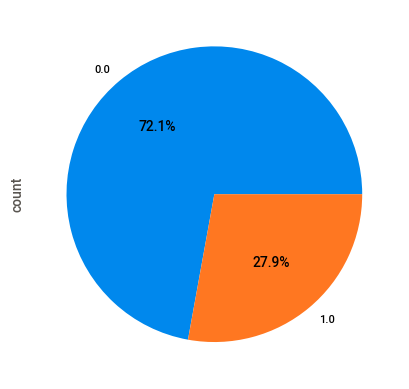

In [18]:
data.Paid.value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: xlabel='comment', ylabel='count'>

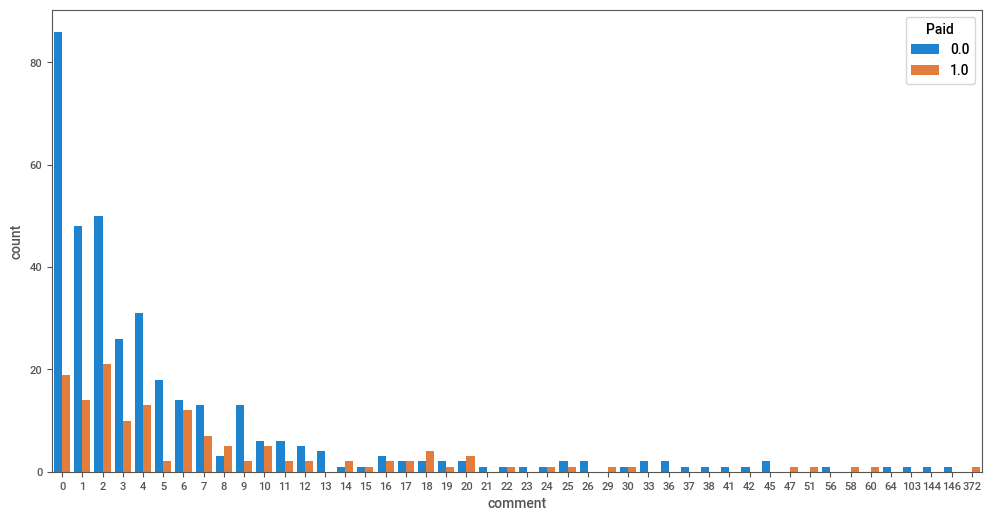

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x='comment',data=data,hue='Paid')

<Axes: xlabel='share', ylabel='comment'>

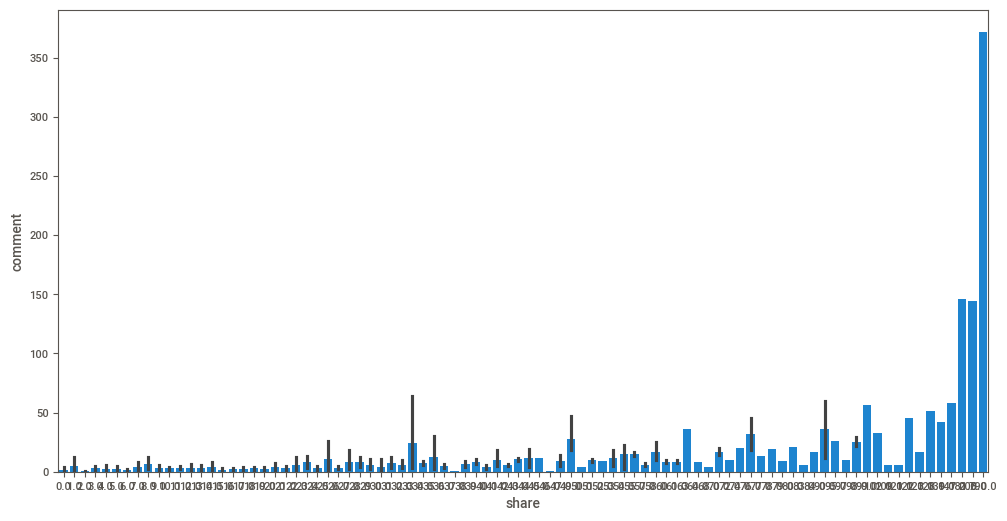

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(y='comment',data=data,x='share')

<Axes: xlabel='Lifetime Post reach by people who like your Page', ylabel='Lifetime People who have liked your Page and engaged with your post'>

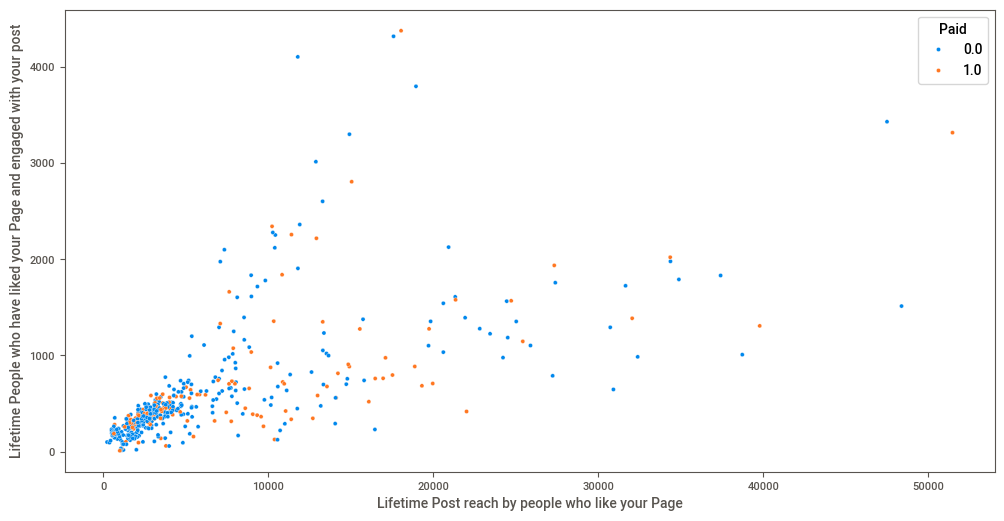

In [21]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Lifetime Post reach by people who like your Page',data=data,y='Lifetime People who have liked your Page and engaged with your post',
               hue='Paid')

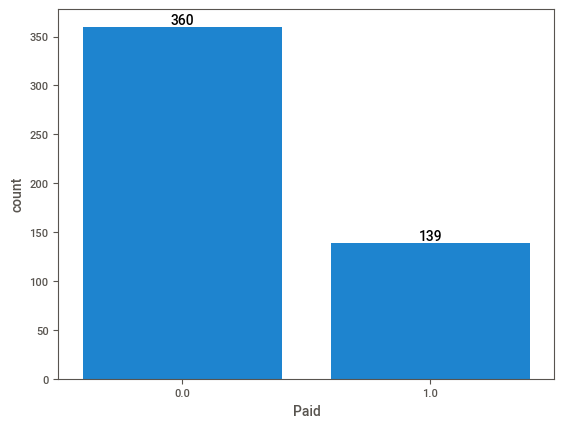

In [22]:
ax = sns.countplot(x=data.Paid)
for i in ax.containers:
    ax.bar_label(i)

<Axes: xlabel='Type', ylabel='Page total likes'>

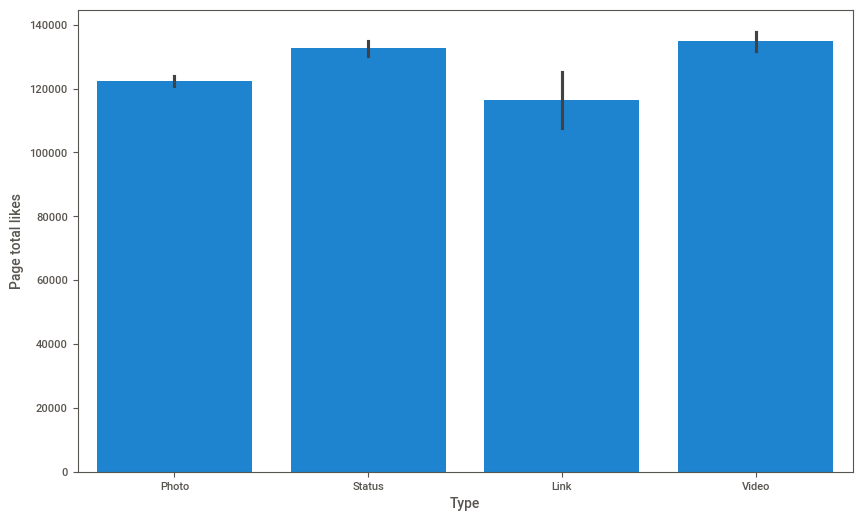

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(y='Page total likes',data=data,x='Type')

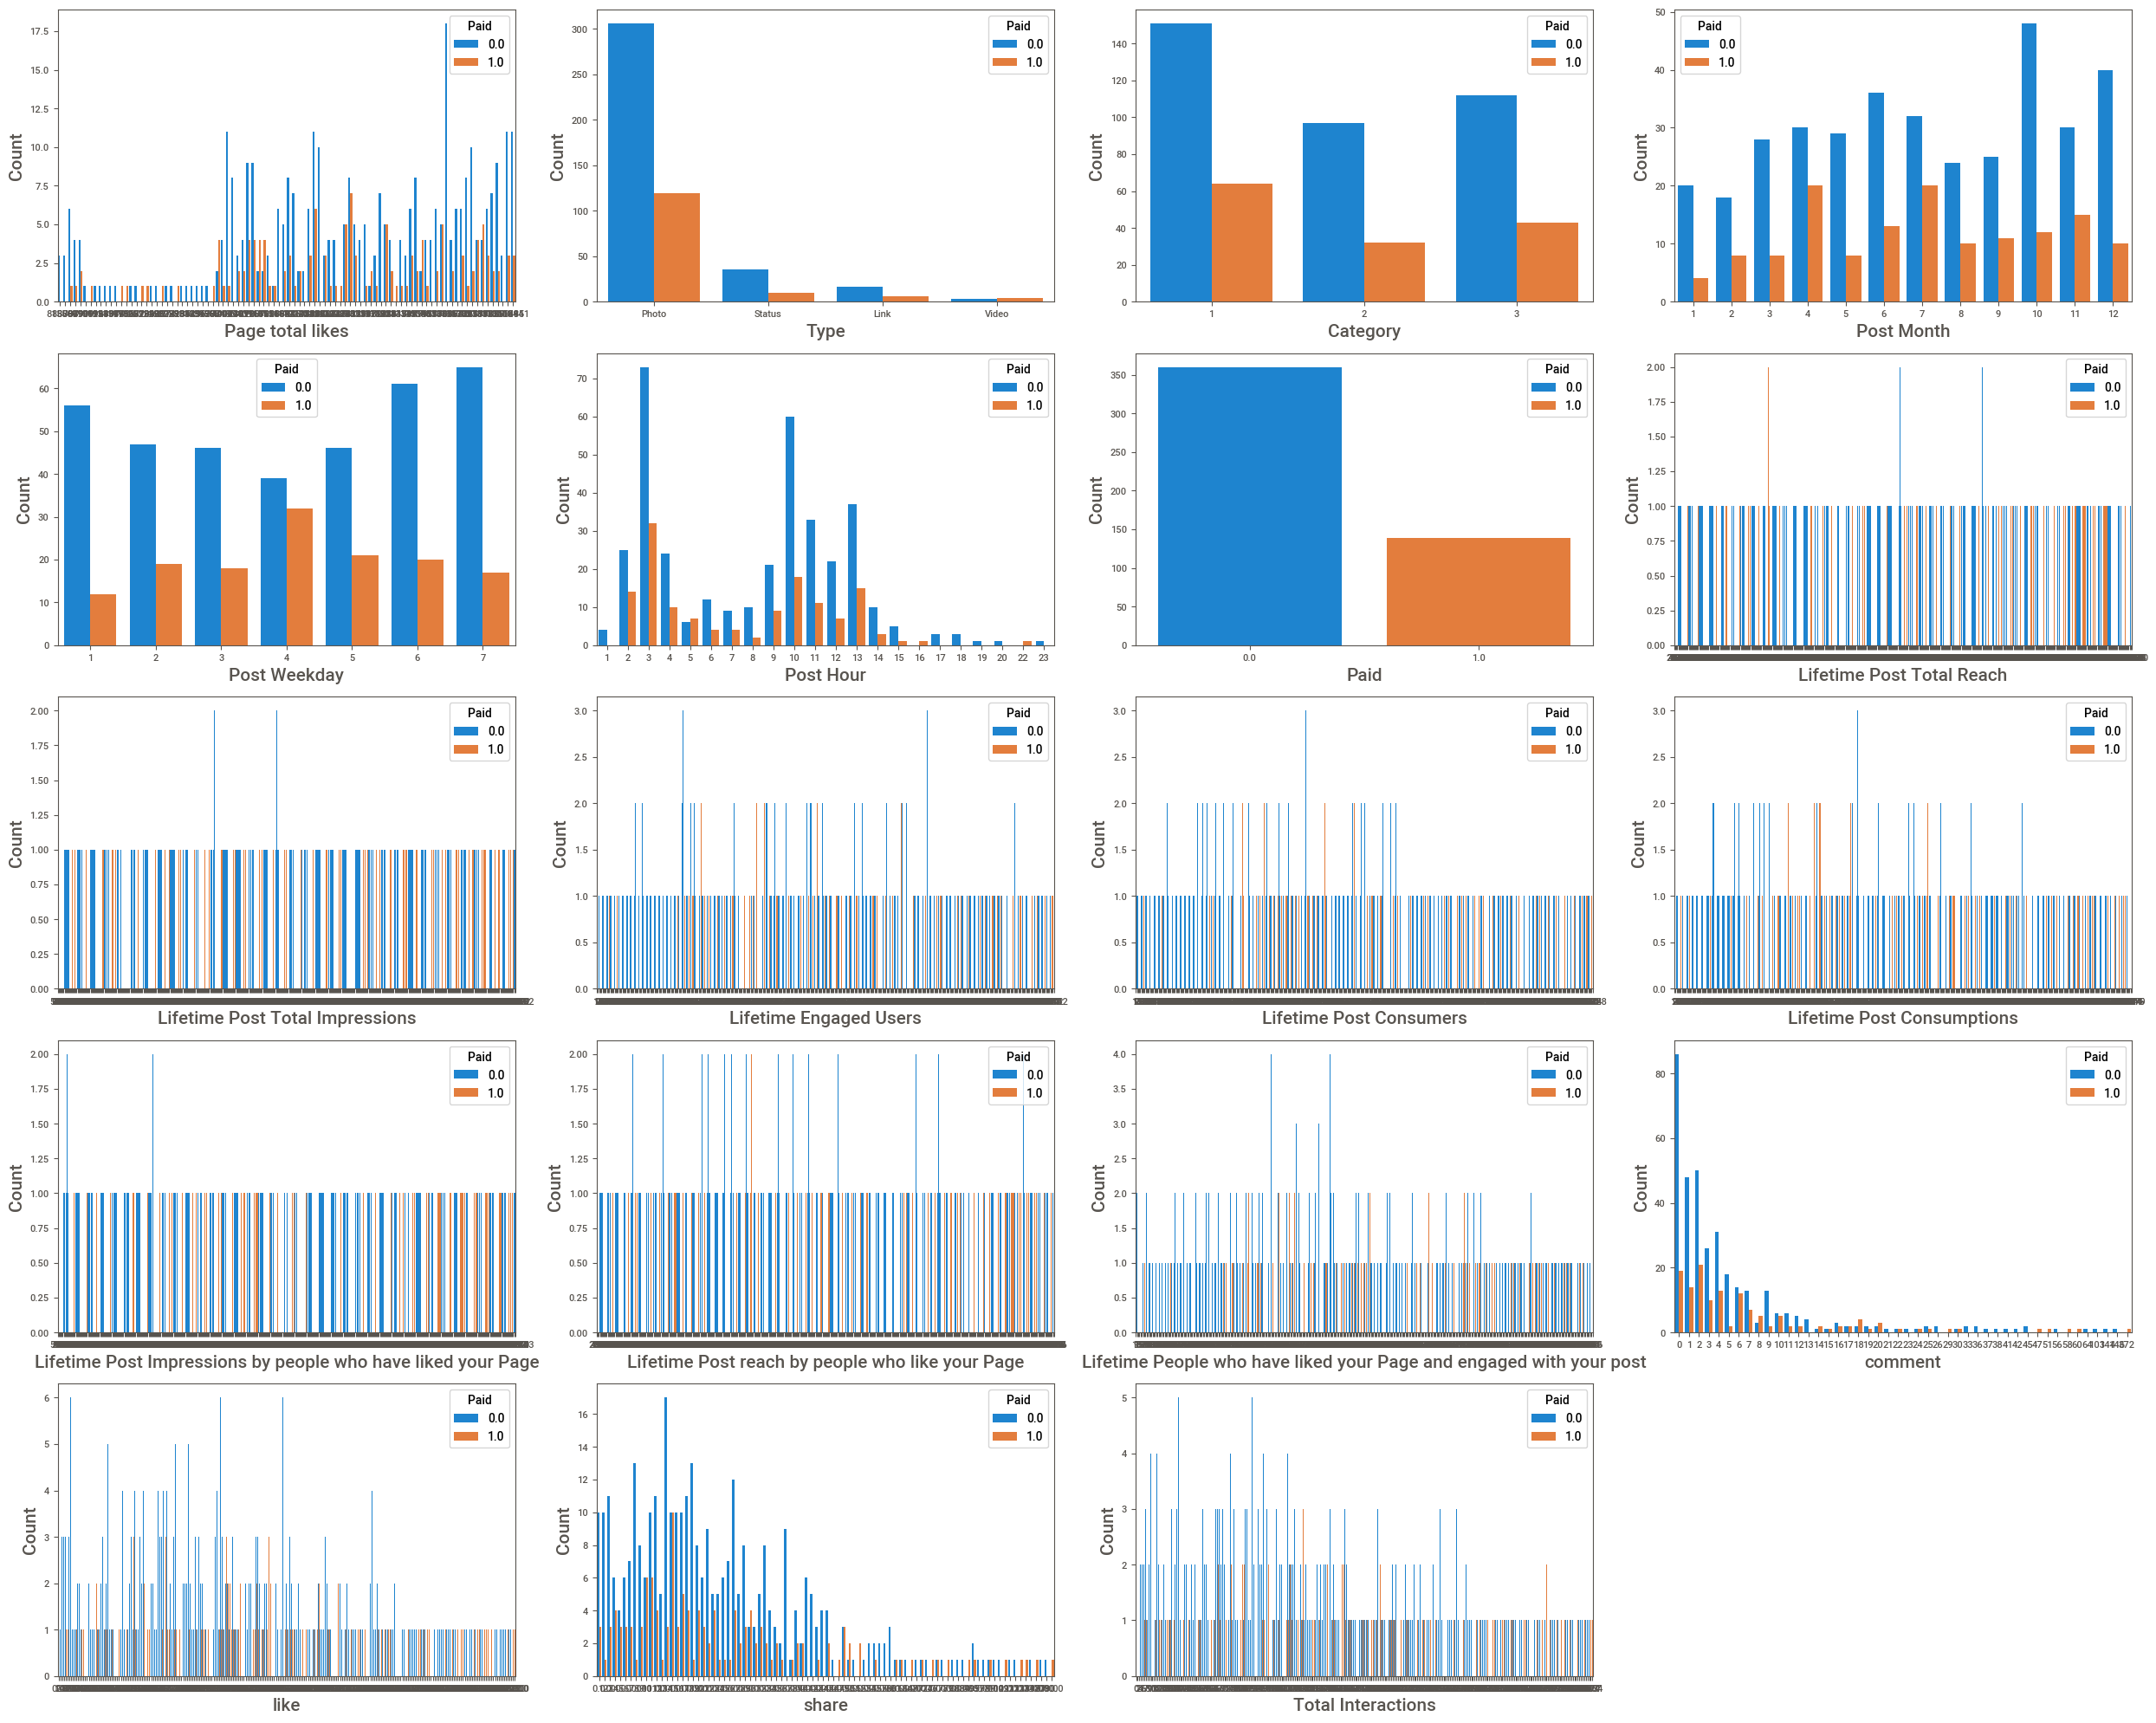

In [24]:
plt.figure(figsize=(25,20))
plotnumber=1
for i in data:
    if plotnumber<=20:
        ax = plt.subplot(5,4,plotnumber)
        sns.countplot(x=data[i],data=data,hue='Paid')
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Count',fontsize=15)
    plotnumber+=1
plt.tight_layout()

<Axes: xlabel='Post Weekday', ylabel='Post Month'>

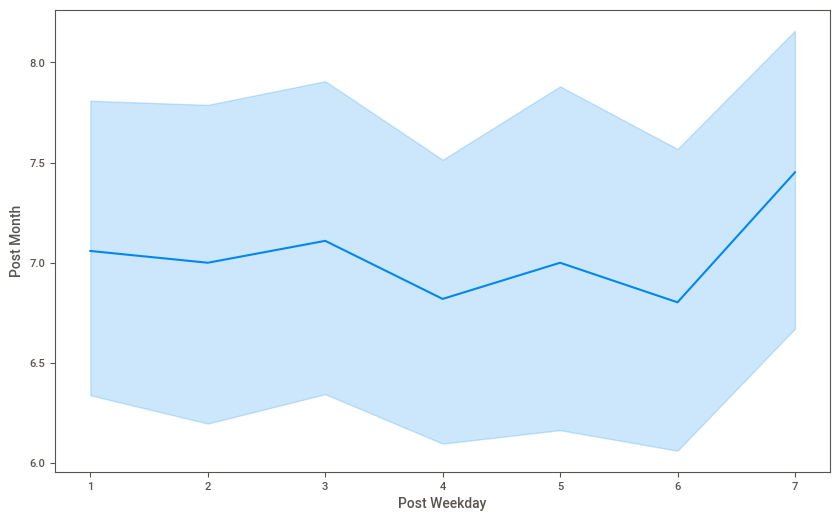

In [25]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Post Weekday',y = 'Post Month',data=data)

<Axes: xlabel='Type', ylabel='Post Month'>

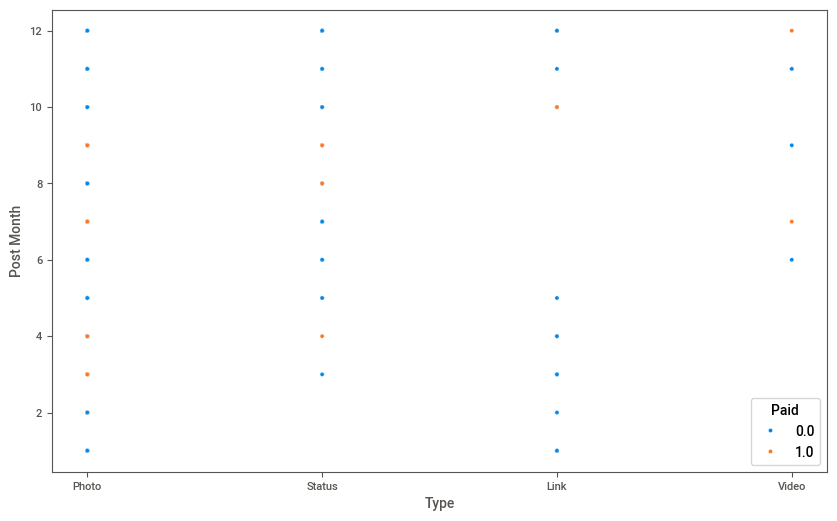

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Type',y = 'Post Month',data=data,hue='Paid')

<Axes: xlabel='Type', ylabel='Post Weekday'>

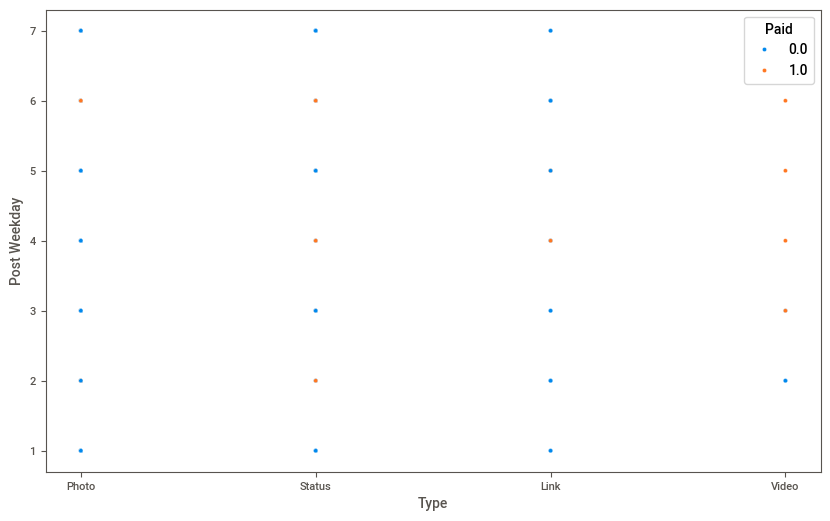

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Type',y = 'Post Weekday',data=data,hue='Paid')

<Axes: xlabel='Type', ylabel='Lifetime Post Impressions by people who have liked your Page'>

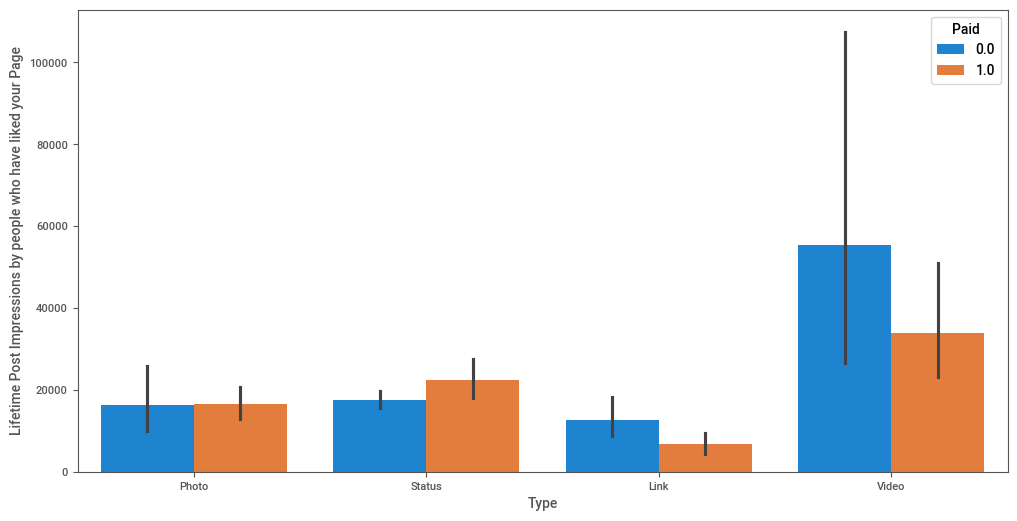

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Type', y = 'Lifetime Post Impressions by people who have liked your Page',data = data,hue = 'Paid')

<Axes: xlabel='Type', ylabel='Lifetime Post reach by people who like your Page'>

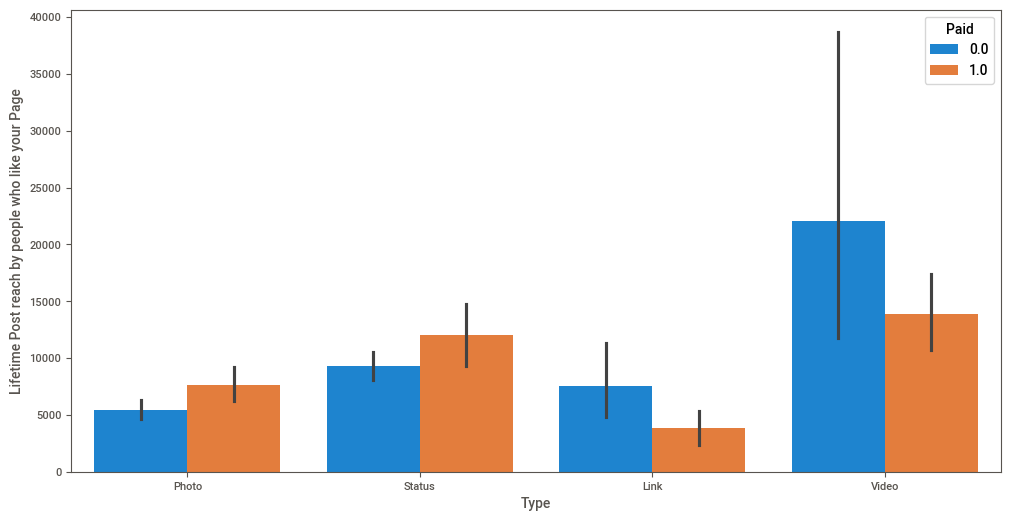

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Type', y = 'Lifetime Post reach by people who like your Page',data = data,hue = 'Paid')

<Axes: xlabel='Type', ylabel='Lifetime People who have liked your Page and engaged with your post'>

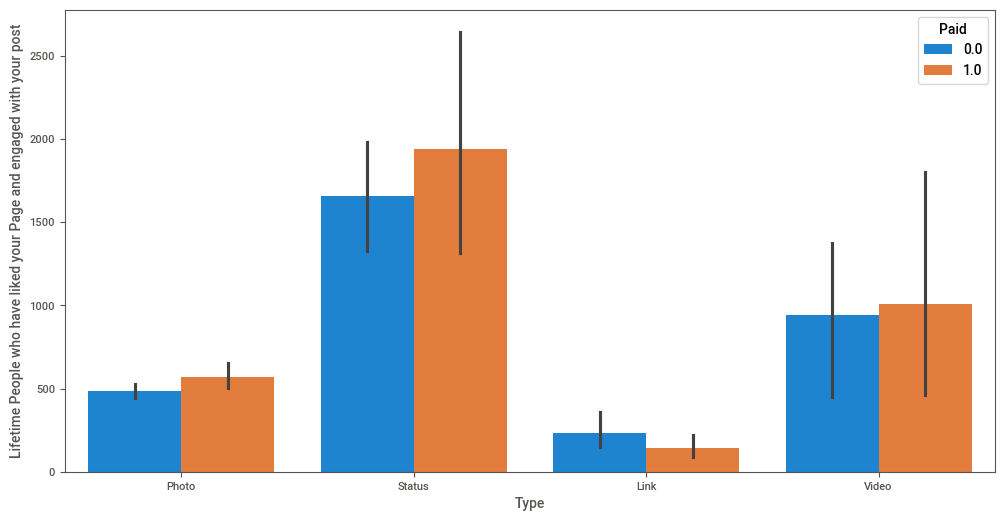

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Type', y = 'Lifetime People who have liked your Page and engaged with your post',data = data,hue = 'Paid')

<Axes: xlabel='Type', ylabel='Total Interactions'>

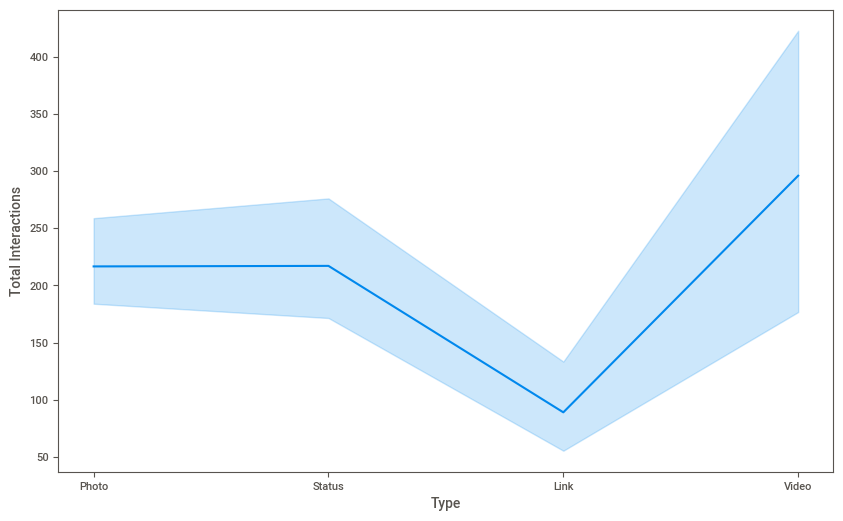

In [31]:
plt.figure(figsize=(10,6))
sns.lineplot(y = 'Total Interactions', x = 'Type',data = data)

<Axes: xlabel='Type', ylabel='like'>

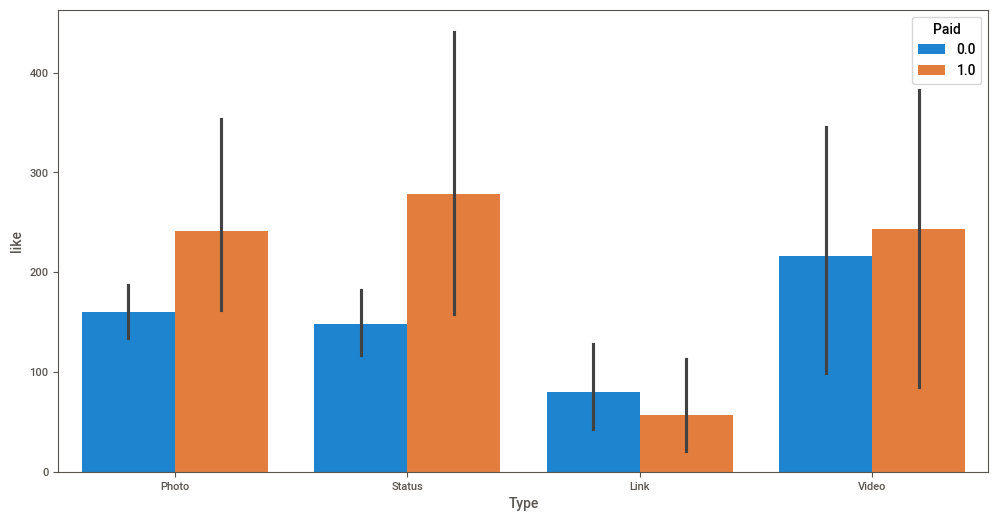

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Type', y = 'like',data = data,hue = 'Paid')

<Axes: xlabel='Type', ylabel='share'>

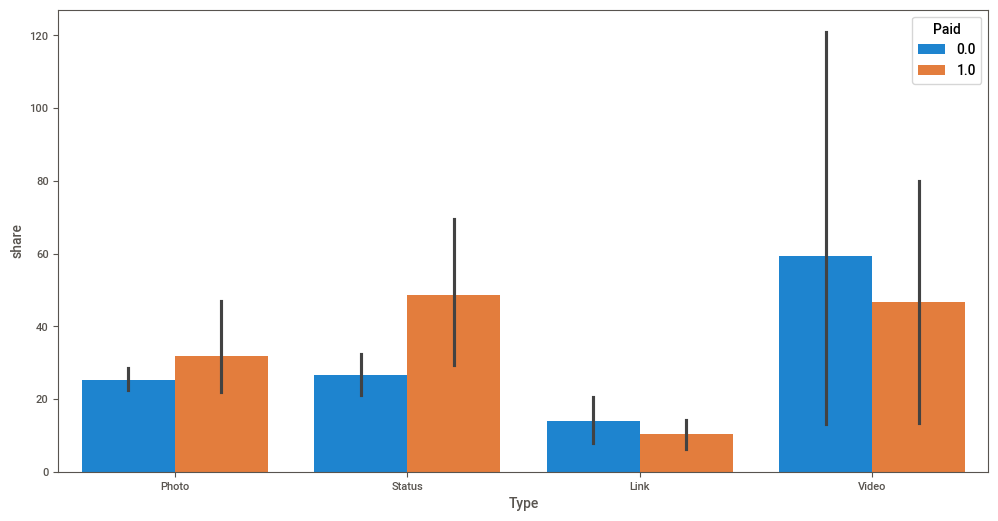

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Type', y = 'share', data = data,hue = 'Paid')

<Axes: xlabel='Type', ylabel='comment'>

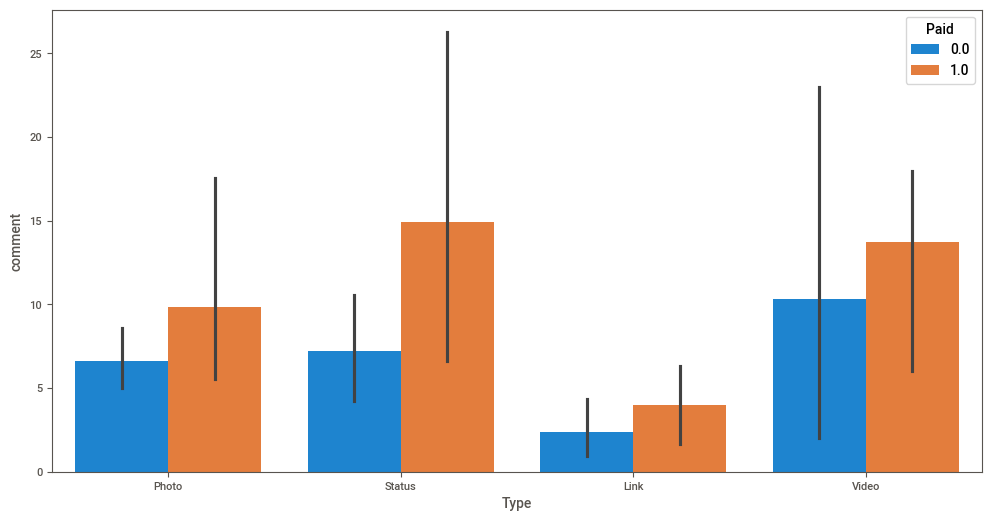

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Type', y = 'comment', data = data,hue = 'Paid')

In [35]:
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


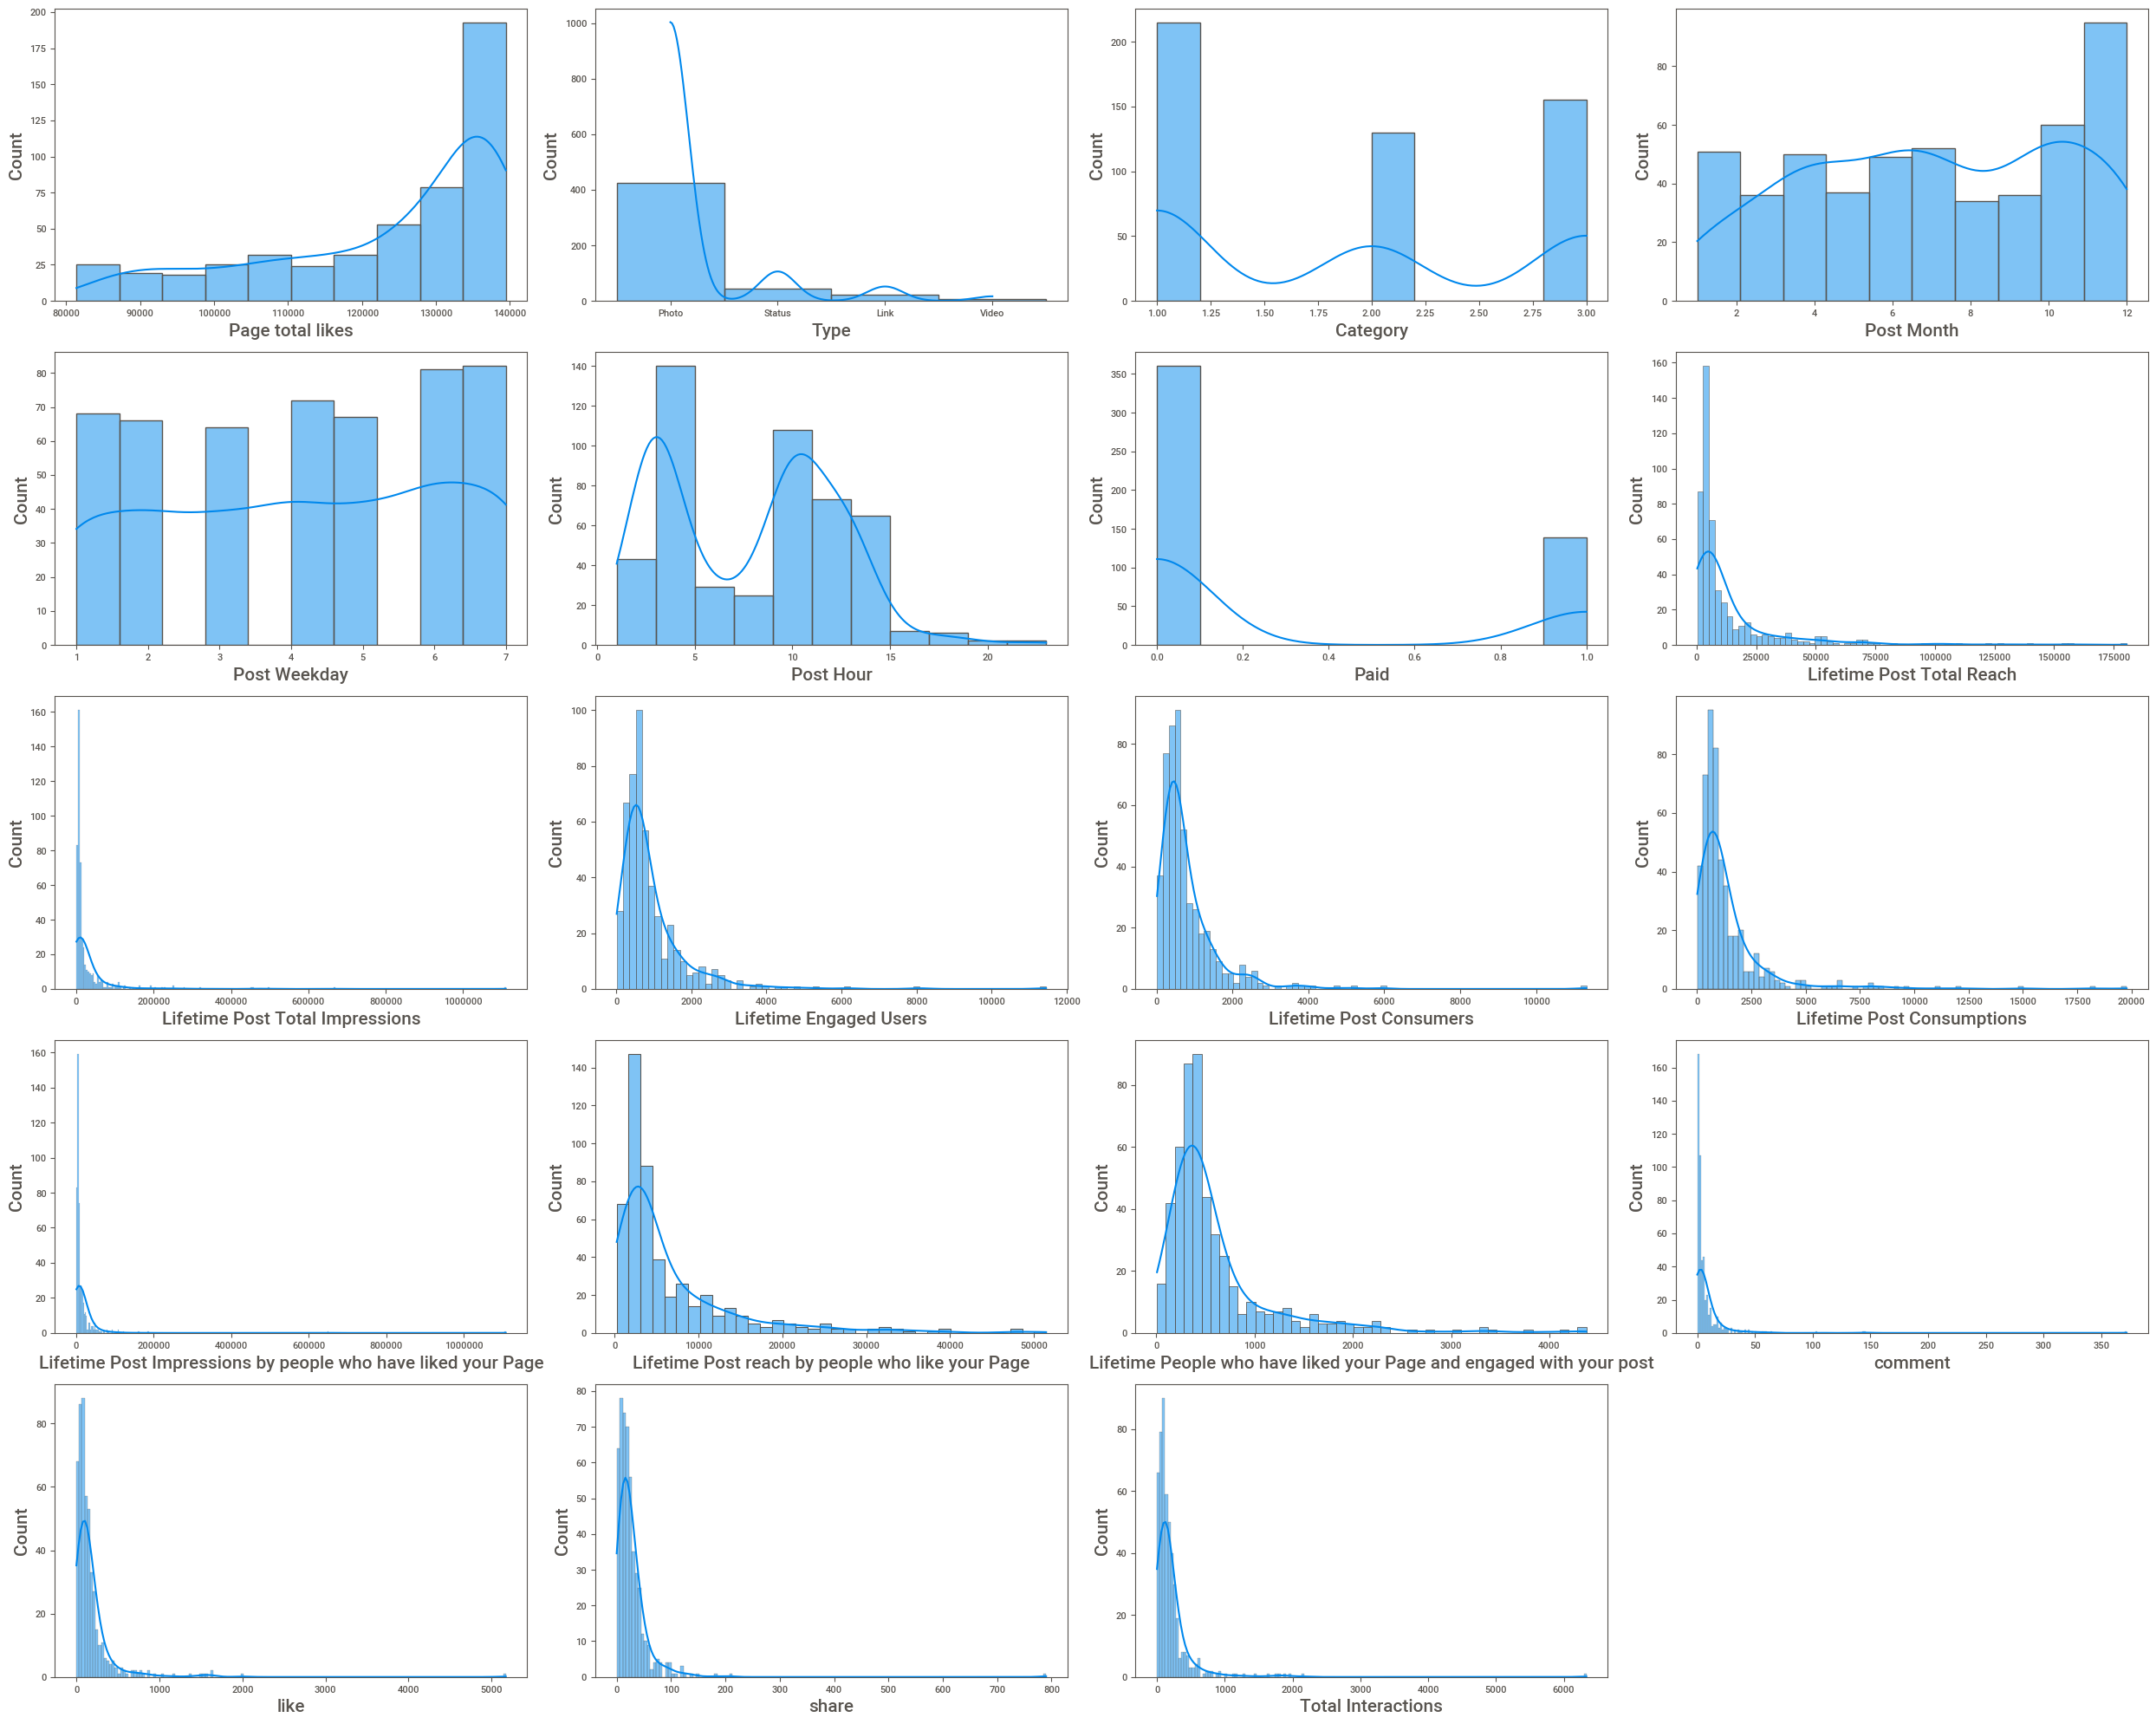

In [36]:
plt.figure(figsize=(25,20))
plotnumber=1
for i in data:
    if plotnumber<=20:
        ax = plt.subplot(5,4,plotnumber)
        sns.histplot(data[i],kde=True)
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Count',fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [37]:
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [38]:
data.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

In [39]:
## rename all columns
data.rename(columns={'Page total likes':'page_total_likes',
                     'Type':'type',
                     'Category':'category',
                     'Post Month':'post_month',
                     'Post Weekday':'post_weekday',
                     'Post Hour':'post_hour',
                     'Paid':'paid',
                     'Lifetime Post Total Reach':'lifetime_post_total_reach',
                     'Lifetime Post Total Impressions':'lifetime_post_total_impressions',
                     'Lifetime Engaged Users':'lifetime_engaged_users',
                     'Lifetime Post Consumers':'lifetime_post_consumers',
                     'Lifetime Post Consumptions':'lifetime_post_consumptions',
                     'Lifetime Post Impressions by people who have liked your Page':'lifetime_post_impressions_by_people_who_have_liked_your_page',
                     'Lifetime Post reach by people who like your Page':'lifetime_post_reach_by_people_who_like_your_page',
                     'Lifetime People who have liked your Page and engaged with your post':'lifetime_people_who_have_liked_your_page_and_engaged_with_your_post',
                     'Total Interactions':'total_interactions'},inplace=True)

## Handle NaN Values

In [40]:
# handling the NaN value 
data.isnull().sum()

page_total_likes                                                       0
type                                                                   0
category                                                               0
post_month                                                             0
post_weekday                                                           0
post_hour                                                              0
paid                                                                   1
lifetime_post_total_reach                                              0
lifetime_post_total_impressions                                        0
lifetime_engaged_users                                                 0
lifetime_post_consumers                                                0
lifetime_post_consumptions                                             0
lifetime_post_impressions_by_people_who_have_liked_your_page           0
lifetime_post_reach_by_people_who_like_your_page   

In [41]:
# paid
data.loc[data['paid'].isnull()==True]

,page_total_likes,type,category,post_month,post_weekday,post_hour,paid,lifetime_post_total_reach,lifetime_post_total_impressions,lifetime_engaged_users,lifetime_post_consumers,lifetime_post_consumptions,lifetime_post_impressions_by_people_who_have_liked_your_page,lifetime_post_reach_by_people_who_like_your_page,lifetime_people_who_have_liked_your_page_and_engaged_with_your_post,comment,like,share,total_interactions
499,81370,Photo,2,1,4,4,NaN,4188,7292,564,524,743,3861,2200,316,0,91.0,28.0,119


In [42]:
data.paid.value_counts()

paid
0.0    360
1.0    139
Name: count, dtype: int64

In [43]:
data.loc[data['paid'].isnull()==True,'paid']=data['paid'].mean()

In [44]:
data.paid.isnull().sum()

0

In [45]:
## change the datatype 
data.paid = data.paid.astype('int')

In [46]:
# like 
data.loc[data['like'].isnull()==True]

,page_total_likes,type,category,post_month,post_weekday,post_hour,paid,lifetime_post_total_reach,lifetime_post_total_impressions,lifetime_engaged_users,lifetime_post_consumers,lifetime_post_consumptions,lifetime_post_impressions_by_people_who_have_liked_your_page,lifetime_post_reach_by_people_who_like_your_page,lifetime_people_who_have_liked_your_page_and_engaged_with_your_post,comment,like,share,total_interactions
111,136736,Photo,1,10,6,8,0,1261,2158,37,37,49,1911,1077,33,0,NaN,NaN,0


In [47]:
data.like.median()

101.0

In [48]:
data.loc[data['like'].isnull()==True,'like']=data['like'].median()

In [49]:
data.like.isnull().sum()

0

In [50]:
# share
data.loc[data['share'].isnull()==True]

,page_total_likes,type,category,post_month,post_weekday,post_hour,paid,lifetime_post_total_reach,lifetime_post_total_impressions,lifetime_engaged_users,lifetime_post_consumers,lifetime_post_consumptions,lifetime_post_impressions_by_people_who_have_liked_your_page,lifetime_post_reach_by_people_who_like_your_page,lifetime_people_who_have_liked_your_page_and_engaged_with_your_post,comment,like,share,total_interactions
111,136736,Photo,1,10,6,8,0,1261,2158,37,37,49,1911,1077,33,0,101.0,NaN,0
120,136393,Photo,1,10,7,9,0,584,1029,273,271,308,943,511,232,0,2.0,NaN,2
124,136393,Photo,1,10,7,6,0,677,1285,251,246,297,1210,615,211,0,7.0,NaN,7
164,135428,Photo,1,9,5,10,0,1060,2004,266,251,337,1705,870,204,0,18.0,NaN,18


In [51]:
data.share.median()

19.0

In [52]:
data.loc[data['share'].isnull()==True,'share']=data['share'].median()

In [53]:
data.share.isnull().sum()

0

In [54]:
data.isnull().sum() # handle NaN values

page_total_likes                                                       0
type                                                                   0
category                                                               0
post_month                                                             0
post_weekday                                                           0
post_hour                                                              0
paid                                                                   0
lifetime_post_total_reach                                              0
lifetime_post_total_impressions                                        0
lifetime_engaged_users                                                 0
lifetime_post_consumers                                                0
lifetime_post_consumptions                                             0
lifetime_post_impressions_by_people_who_have_liked_your_page           0
lifetime_post_reach_by_people_who_like_your_page   

## Checking outliers

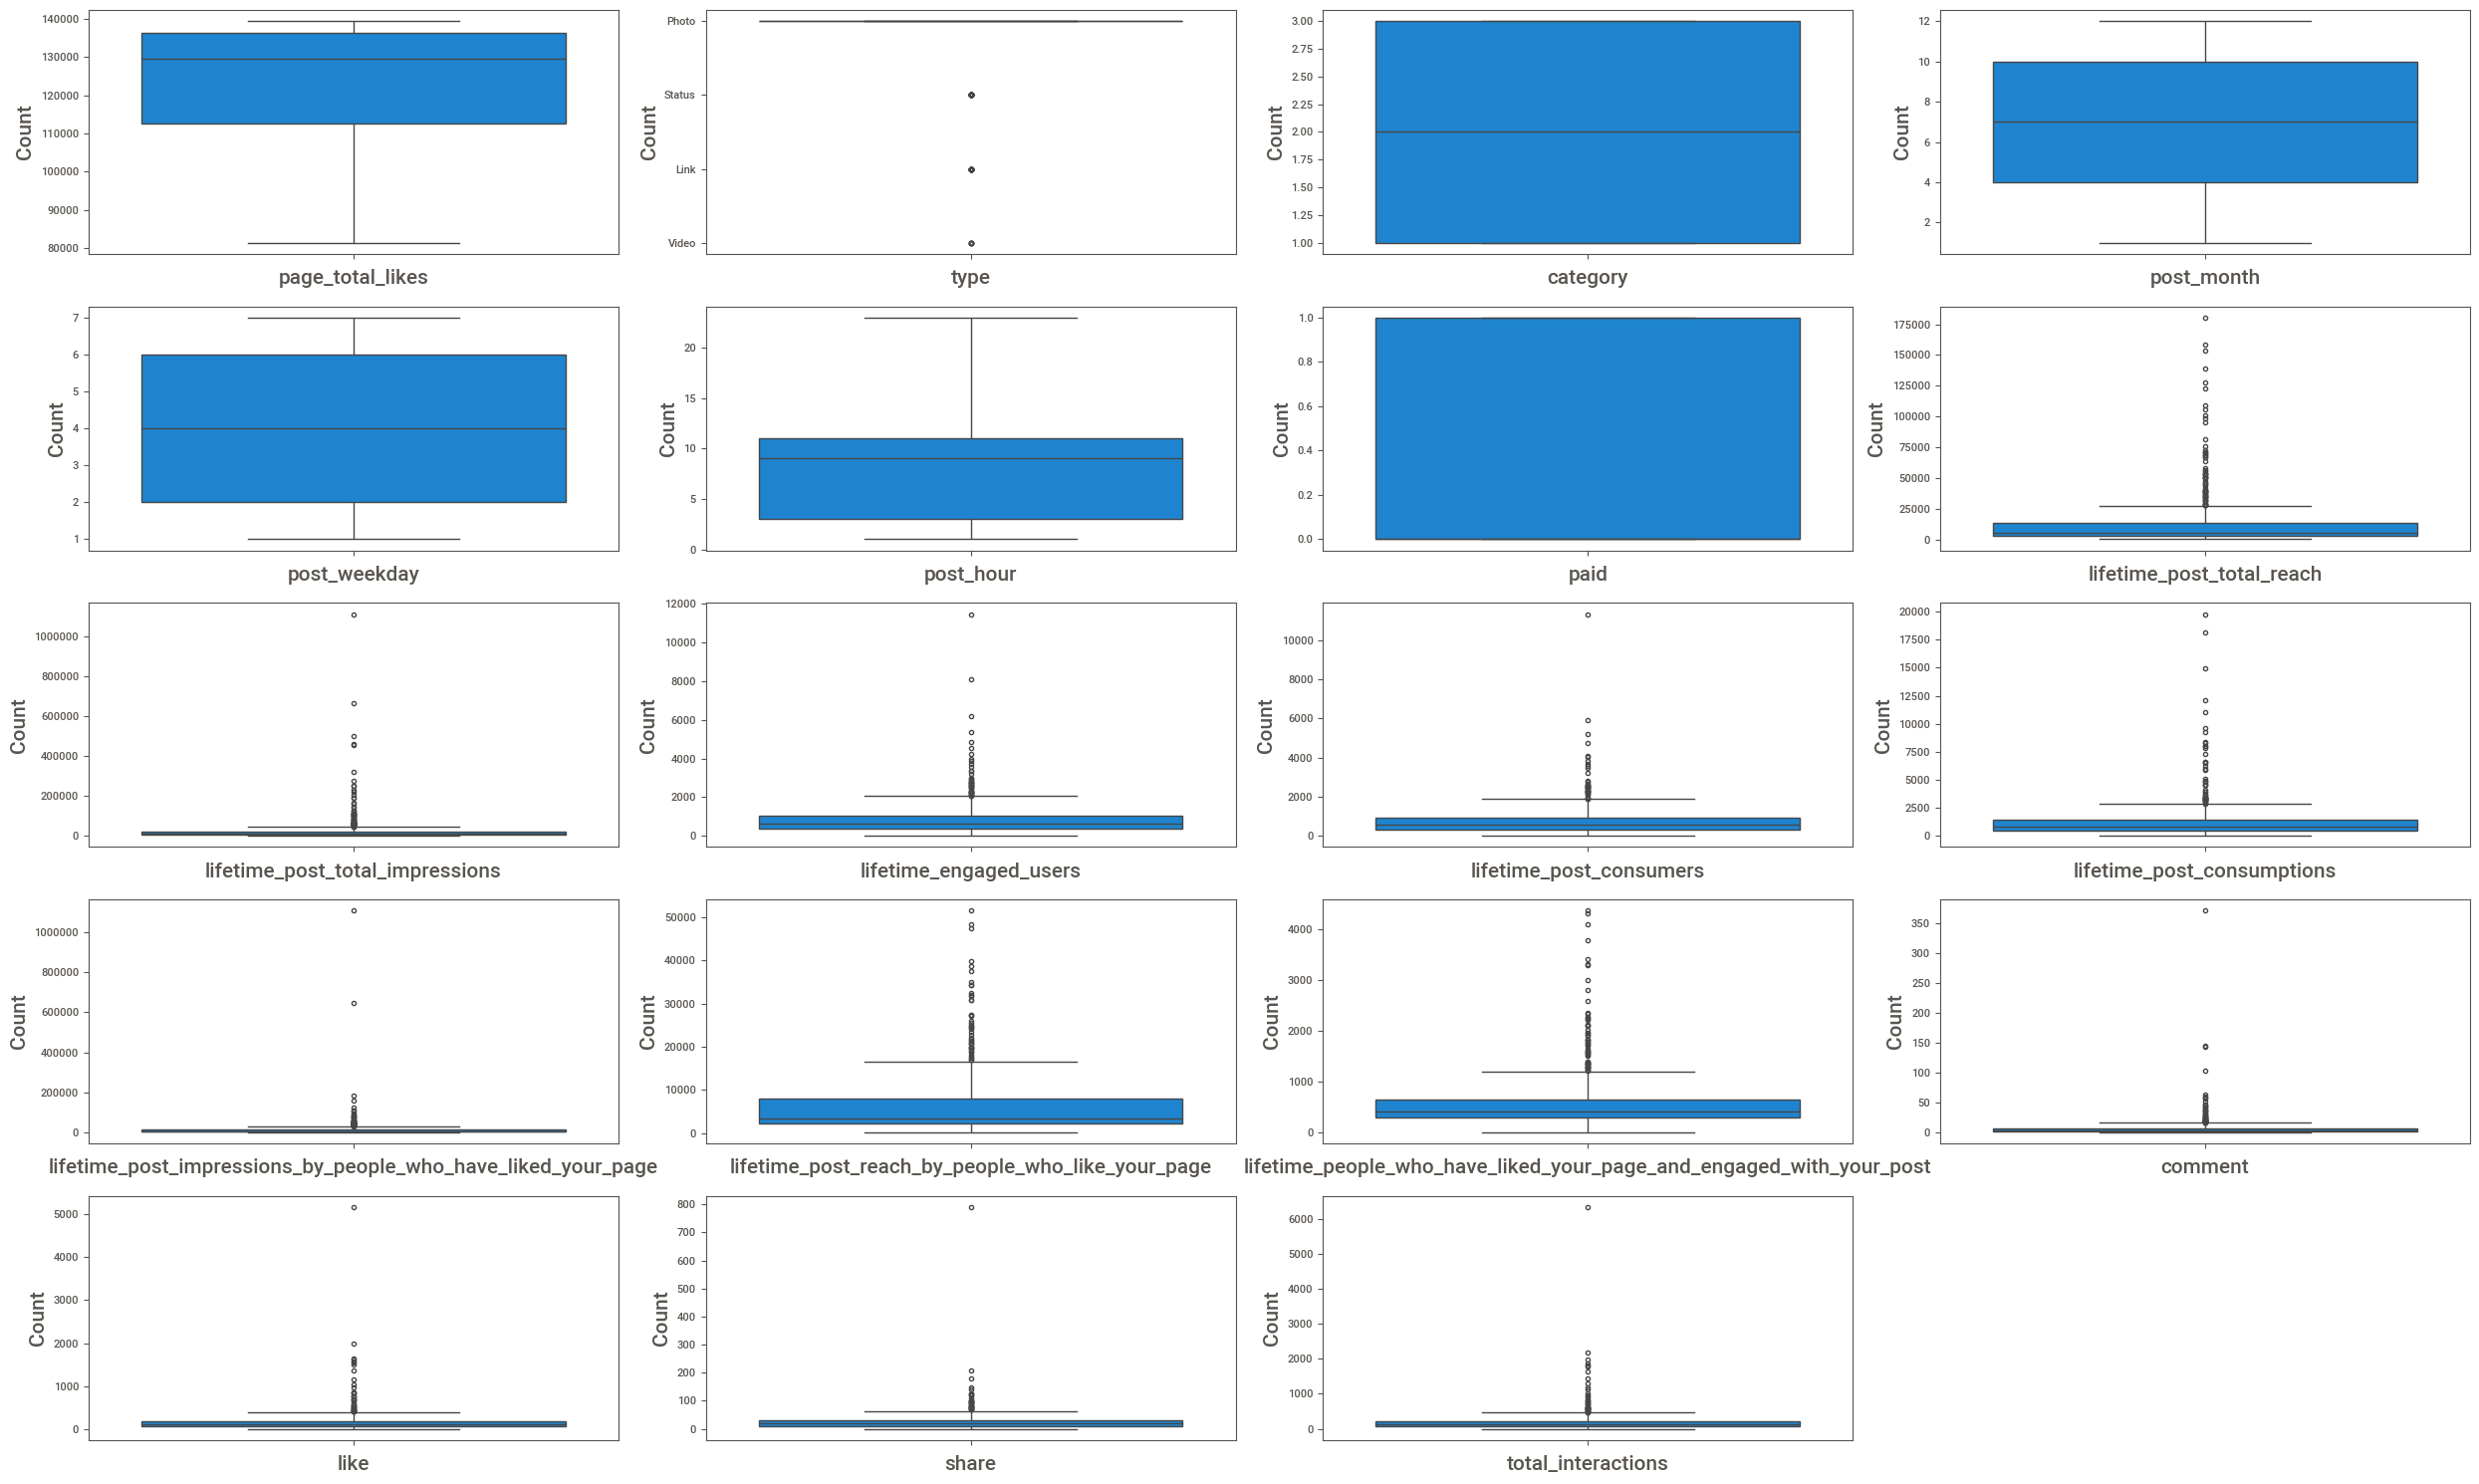

In [55]:
plt.figure(figsize=(25,15))
plotnumber=1
for i in data:
    if plotnumber<=20:
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(data[i])
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Count',fontsize=15)
    plotnumber+=1
plt.tight_layout()
    

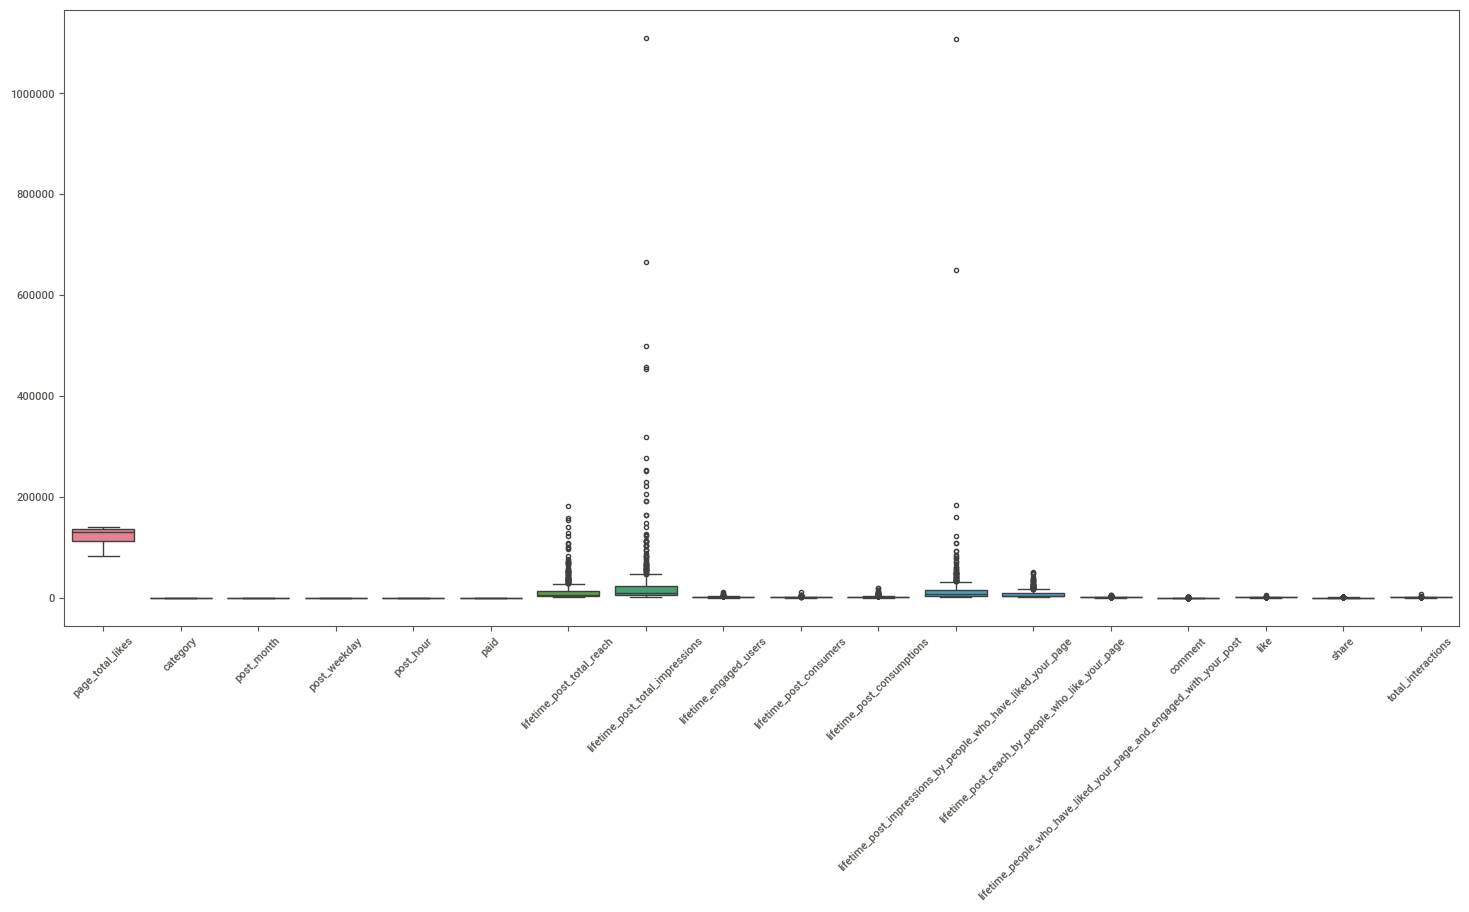

In [56]:
fig,ax = plt.subplots(figsize=(18,8))
sns.boxplot(data=data,ax=ax)
plt.xticks(rotation=45)
# plt.savefig("Boxplot.jpg")
plt.show()

In [57]:
## lifetime_post_total_reach
Q3 = data.lifetime_post_total_reach.quantile(0.75)
Q1 = data.lifetime_post_total_reach.quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print(upper_limit)
print(lower_limit)

27947.5
-11464.5


In [58]:
len(data.loc[data['lifetime_post_total_reach']>upper_limit])/len(data)*100 
## we cannot handle the outliers in this columns beacause the percentage is 13.8% so we can't handle this columns outliers

13.8

In [59]:
len(data.loc[data['lifetime_post_total_reach']<lower_limit])/len(data)*100 

0.0

In [60]:
data.loc[data['lifetime_post_total_reach']>upper_limit]

,page_total_likes,type,category,post_month,post_weekday,post_hour,paid,lifetime_post_total_reach,lifetime_post_total_impressions,lifetime_engaged_users,lifetime_post_consumers,lifetime_post_consumptions,lifetime_post_impressions_by_people_who_have_liked_your_page,lifetime_post_reach_by_people_who_like_your_page,lifetime_people_who_have_liked_your_page_and_engaged_with_your_post,comment,like,share,total_interactions
3,139441,Photo,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
17,138414,Photo,1,12,2,12,1,53264,111785,1706,1103,1655,92512,39776,1307,15,678.0,20.0,713
29,138895,Video,1,12,4,11,1,36208,61262,1141,1068,1728,30131,14112,559,18,143.0,13.0,174
61,138185,Photo,1,11,3,2,1,50912,164528,630,513,952,54653,12704,346,8,144.0,10.0,162
62,138185,Photo,1,11,2,10,1,28752,47358,802,654,1268,14091,7456,408,10,179.0,13.0,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,92079,Photo,1,2,6,13,0,158208,453213,2482,2319,3412,81938,20608,1034,9,268.0,36.0,313
476,86909,Photo,1,1,6,10,1,37088,10966,2728,2288,3183,66311,34352,2021,7,579.0,47.0,633
477,86909,Link,1,1,6,4,0,39600,7927,572,496,581,12522,8176,167,1,101.0,5.0,107
482,86491,Photo,3,1,3,10,0,66784,9456,2969,2833,3645,17809,11328,801,3,187.0,36.0,226


In [61]:
# lifetime_post_total_impressions
Q3 = data.lifetime_post_total_impressions.quantile(0.75)
Q1 = data.lifetime_post_total_impressions.quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print(upper_limit)
print(lower_limit)

46671.625
-18891.375


In [62]:
len(data.loc[data['lifetime_post_total_impressions']>upper_limit])/len(data)*100

13.600000000000001

In [63]:
len(data.loc[data['lifetime_post_total_impressions']<lower_limit])/len(data)*100 

0.0

In [64]:
# lifetime_engaged_users
Q3 = data.lifetime_engaged_users.quantile(0.75)
Q1 = data.lifetime_engaged_users.quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print(upper_limit)
print(lower_limit)

2064.375
-608.625


In [65]:
len(data.loc[data['lifetime_engaged_users']>upper_limit])/len(data)*100

8.799999999999999

In [66]:
len(data.loc[data['lifetime_engaged_users']<lower_limit])/len(data)*100

0.0

In [67]:
# lifetime_post_consumers
Q3 = data.lifetime_post_consumers.quantile(0.75)
Q1 = data.lifetime_post_consumers.quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print(upper_limit)
print(lower_limit)

1890.0
-602.0


In [68]:
len(data.loc[data['lifetime_post_consumers']>upper_limit])/len(data)*100

7.6

In [69]:
len(data.loc[data['lifetime_post_consumers']<lower_limit])/len(data)*100

0.0

In [70]:
# lifetime_post_consumptions
Q3 = data.lifetime_post_consumptions.quantile(0.75)
Q1 = data.lifetime_post_consumptions.quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print(upper_limit)
print(lower_limit)

2893.625
-921.375


In [71]:
len(data.loc[data['lifetime_post_consumptions']>upper_limit])/len(data)*100

9.8

In [72]:
len(data.loc[data['lifetime_post_consumptions']<lower_limit])/len(data)*100

0.0

In [73]:
# lifetime_post_impressions_by_people_who_have_liked_your_page
Q3 = data.lifetime_post_impressions_by_people_who_have_liked_your_page.quantile(0.75)
Q1 = data.lifetime_post_impressions_by_people_who_have_liked_your_page.quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print(upper_limit)
print(lower_limit)

31196.625
-12366.375


In [74]:
len(data.loc[data['lifetime_post_impressions_by_people_who_have_liked_your_page']>upper_limit])/len(data)*100

10.6

In [75]:
len(data.loc[data['lifetime_post_impressions_by_people_who_have_liked_your_page']<lower_limit])/len(data)*100

0.0

In [76]:
# lifetime_post_reach_by_people_who_like_your_page
Q3 = data.lifetime_post_reach_by_people_who_like_your_page.quantile(0.75)
Q1 = data.lifetime_post_reach_by_people_who_like_your_page.quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print(upper_limit)
print(lower_limit)

16700.25
-6529.75


In [77]:
len(data.loc[data['lifetime_post_reach_by_people_who_like_your_page']>upper_limit])/len(data)*100

9.0

In [78]:
len(data.loc[data['lifetime_post_reach_by_people_who_like_your_page']<lower_limit])/len(data)*100

0.0

In [79]:
# lifetime_people_who_have_liked_your_page_and_engaged_with_your_post
Q3 = data.lifetime_people_who_have_liked_your_page_and_engaged_with_your_post.quantile(0.75)
Q1 = data.lifetime_people_who_have_liked_your_page_and_engaged_with_your_post.quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print(upper_limit)
print(lower_limit)

1204.125
-256.875


In [80]:
len(data.loc[data['lifetime_people_who_have_liked_your_page_and_engaged_with_your_post']>upper_limit])/len(data)*100

11.799999999999999

In [81]:
len(data.loc[data['lifetime_people_who_have_liked_your_page_and_engaged_with_your_post']<lower_limit])/len(data)*100

0.0

In [82]:
# comment
Q3 = data.comment.quantile(0.75)
Q1 = data.comment.quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print(upper_limit)
print(lower_limit)

16.0
-8.0


In [83]:
len(data.loc[data['comment']>upper_limit])/len(data)*100

10.4

In [84]:
len(data.loc[data['comment']<lower_limit])/len(data)*100

0.0

In [85]:
# like
Q3 = data.like.quantile(0.75)
Q1 = data.like.quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print(upper_limit)
print(lower_limit)

383.0
-139.0


In [86]:
len(data.loc[data['like']>upper_limit])/len(data)*100

8.0

In [87]:
len(data.loc[data['like']<lower_limit])/len(data)*100

0.0

In [88]:
# share
Q3 = data.share.quantile(0.75)
Q1 = data.share.quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print(upper_limit)
print(lower_limit)

65.0
-23.0


In [89]:
len(data.loc[data['share']>upper_limit])/len(data)*100

6.4

In [90]:
len(data.loc[data['share']<lower_limit])/len(data)*100

0.0

In [91]:
# total_interactions
Q3 = data.total_interactions.quantile(0.75)
Q1 = data.total_interactions.quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print(upper_limit)
print(lower_limit)

464.75
-165.25


In [92]:
len(data.loc[data['total_interactions']>upper_limit])/len(data)*100

8.0

In [93]:
len(data.loc[data['total_interactions']<lower_limit])/len(data)*100

0.0

## Label Encoding Using map

In [94]:
data.type.value_counts()

type
Photo     426
Status     45
Link       22
Video       7
Name: count, dtype: int64

In [95]:
data.type=data.type.map({'Photo':3,'Status':2,'Link':1,'Video':0})

In [96]:
data.head()

,page_total_likes,type,category,post_month,post_weekday,post_hour,paid,lifetime_post_total_reach,lifetime_post_total_impressions,lifetime_engaged_users,lifetime_post_consumers,lifetime_post_consumptions,lifetime_post_impressions_by_people_who_have_liked_your_page,lifetime_post_reach_by_people_who_like_your_page,lifetime_people_who_have_liked_your_page_and_engaged_with_your_post,comment,like,share,total_interactions
0,139441,3,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,2,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,3,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,3,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,3,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


## Check Corr-relation

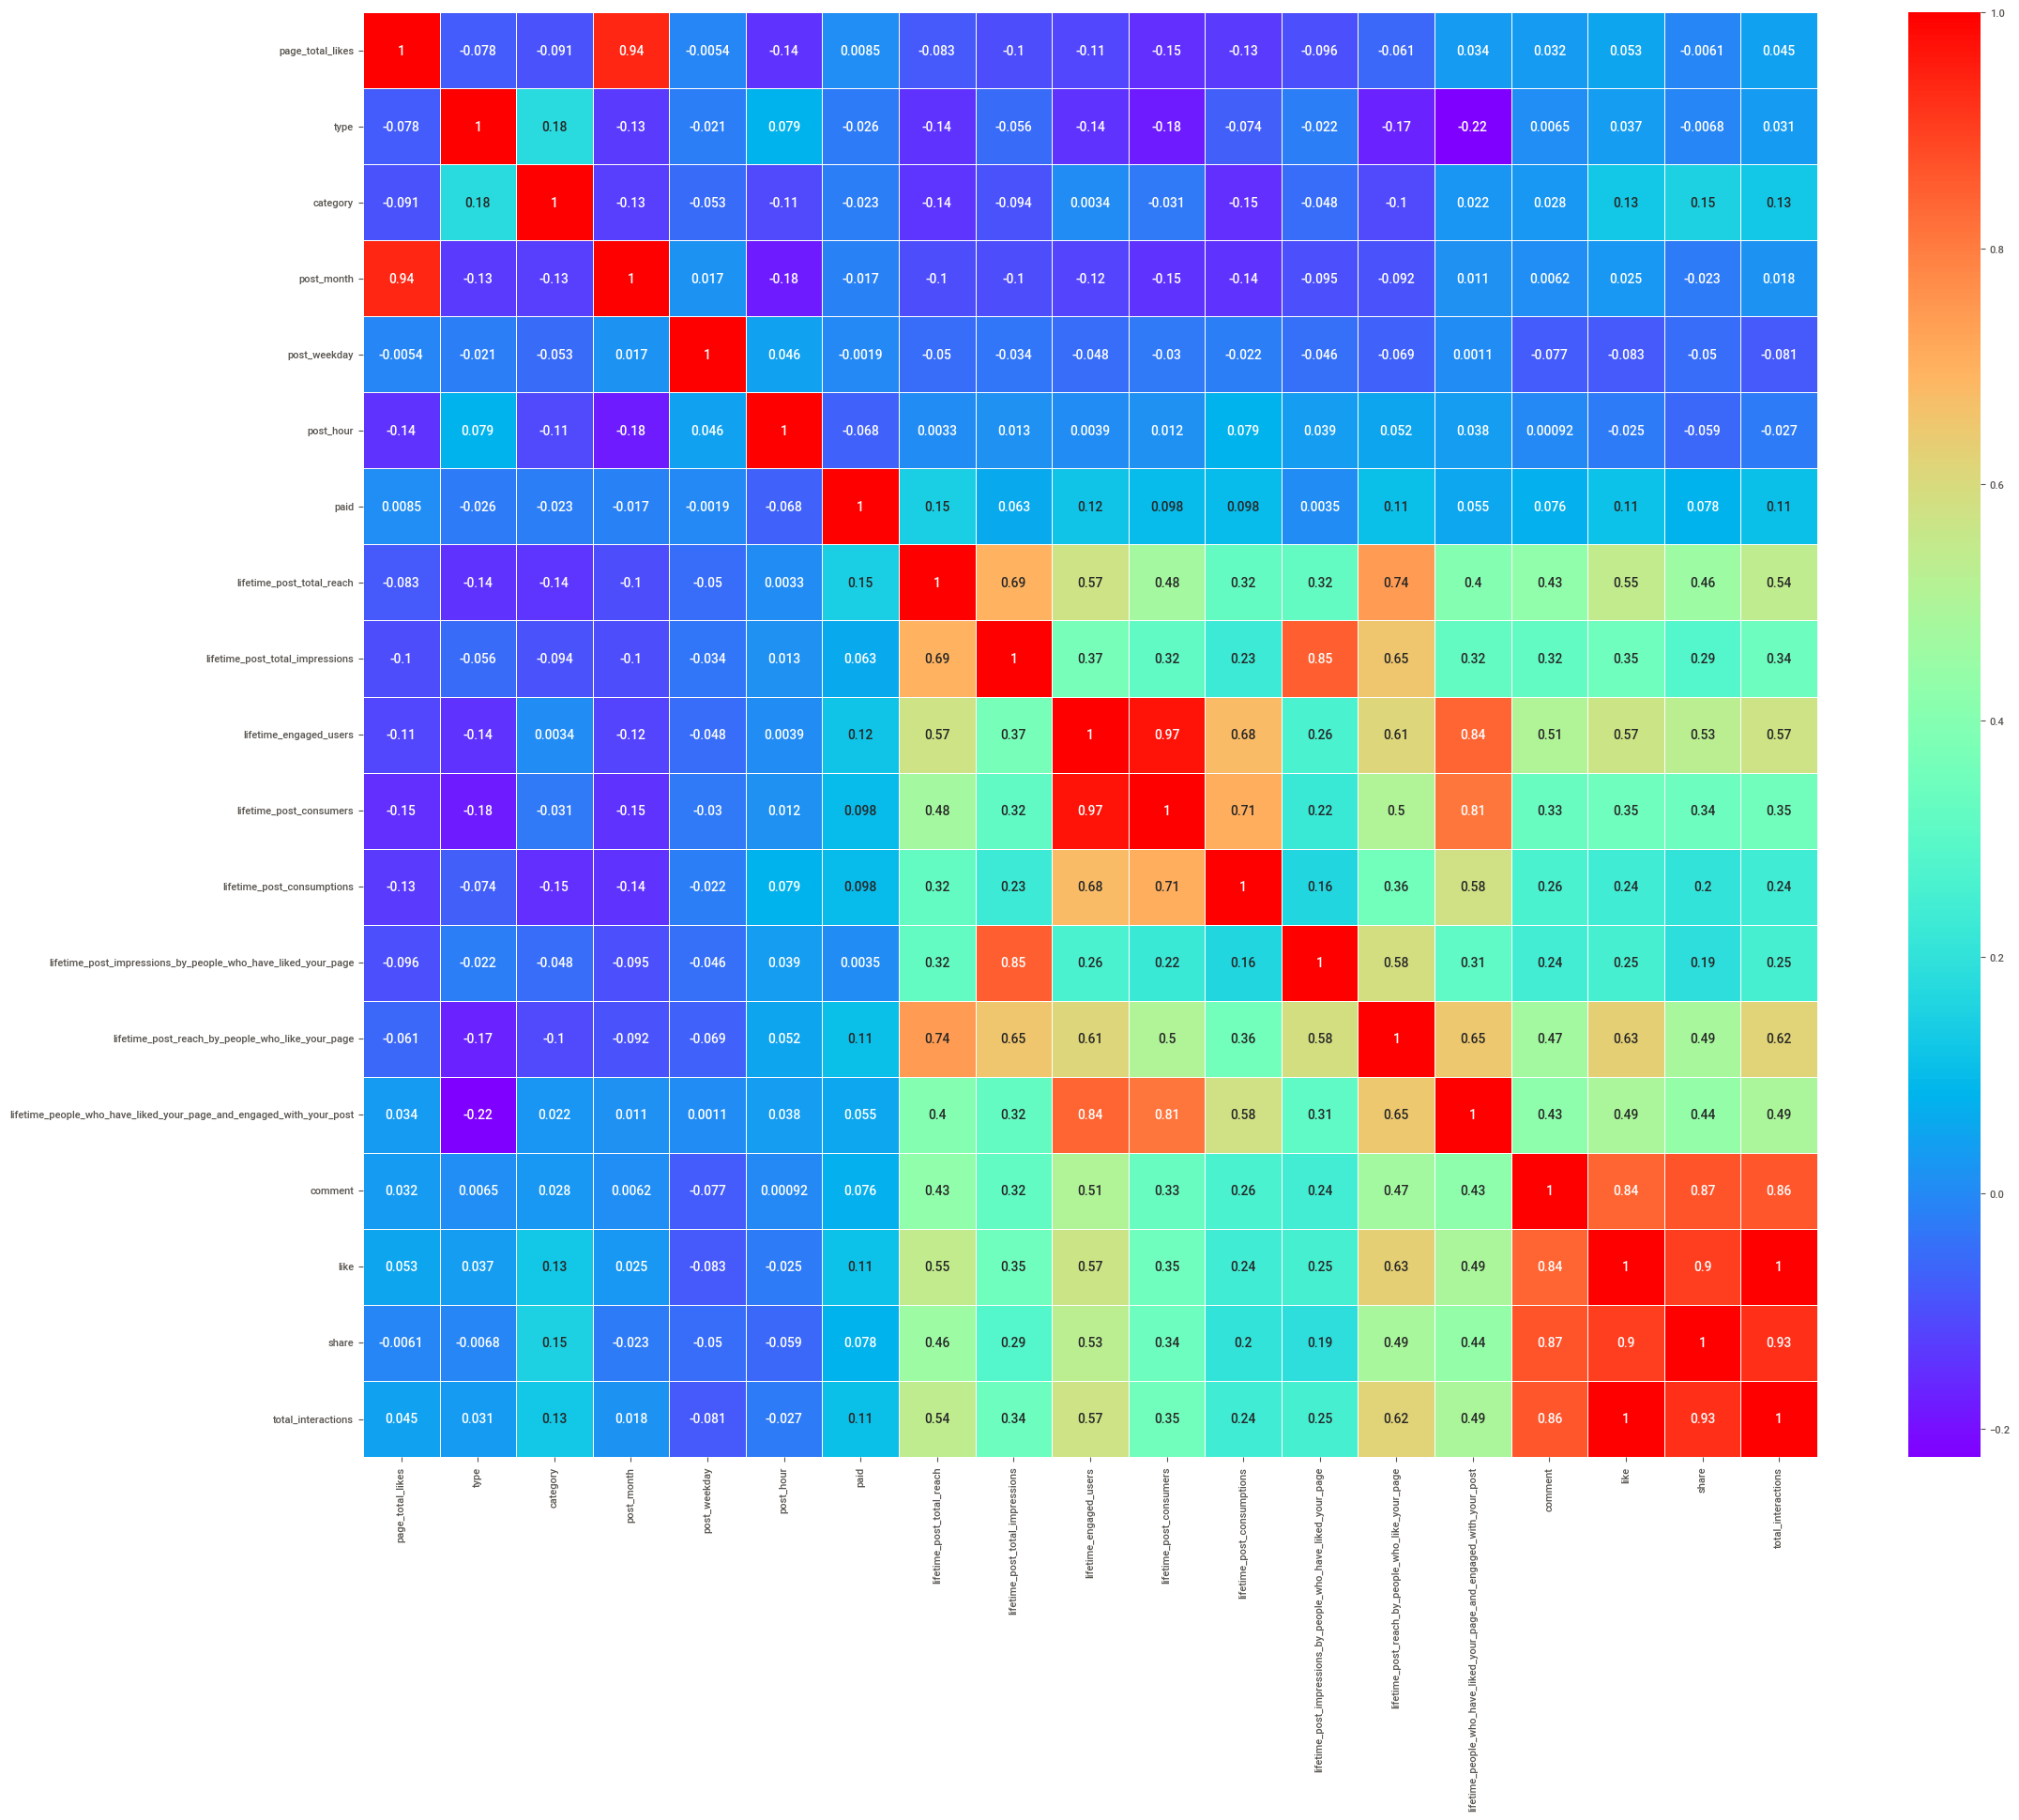

In [97]:
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(),annot=True,cmap='rainbow',linewidths=.5)
plt.show()

In [98]:
## copy original data to duplicated data
data1=data.copy()

In [99]:
data1.head()

,page_total_likes,type,category,post_month,post_weekday,post_hour,paid,lifetime_post_total_reach,lifetime_post_total_impressions,lifetime_engaged_users,lifetime_post_consumers,lifetime_post_consumptions,lifetime_post_impressions_by_people_who_have_liked_your_page,lifetime_post_reach_by_people_who_like_your_page,lifetime_people_who_have_liked_your_page_and_engaged_with_your_post,comment,like,share,total_interactions
0,139441,3,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,2,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,3,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,3,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,3,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


## Let's Scale the data

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data1[['page_total_likes','type', 'category', 'post_month', 'post_weekday',
       'post_hour', 'lifetime_post_total_reach',
       'lifetime_post_total_impressions', 'lifetime_engaged_users',
       'lifetime_post_consumers', 'lifetime_post_consumptions',
       'lifetime_post_impressions_by_people_who_have_liked_your_page',
       'lifetime_post_reach_by_people_who_like_your_page',
       'lifetime_people_who_have_liked_your_page_and_engaged_with_your_post',
       'comment', 'like', 'share', 'total_interactions']] = scaler.fit_transform(data1[['page_total_likes','type', 'category', 'post_month', 'post_weekday',
       'post_hour', 'lifetime_post_total_reach',
       'lifetime_post_total_impressions', 'lifetime_engaged_users',
       'lifetime_post_consumers', 'lifetime_post_consumptions',
       'lifetime_post_impressions_by_people_who_have_liked_your_page',
       'lifetime_post_reach_by_people_who_like_your_page',
       'lifetime_people_who_have_liked_your_page_and_engaged_with_your_post',
       'comment', 'like', 'share', 'total_interactions']])

In [101]:
data1.head()

,page_total_likes,type,category,post_month,post_weekday,post_hour,paid,lifetime_post_total_reach,lifetime_post_total_impressions,lifetime_engaged_users,lifetime_post_consumers,lifetime_post_consumptions,lifetime_post_impressions_by_people_who_have_liked_your_page,lifetime_post_reach_by_people_who_like_your_page,lifetime_people_who_have_liked_your_page_and_engaged_with_your_post,comment,like,share,total_interactions
0,0.999403,0.375315,0.140875,1.501531,-0.073940,-1.109019,0,-0.490859,-0.319251,-0.754391,-0.782390,-0.628507,-0.229166,-0.644420,-0.802117,-0.164558,-0.306076,-0.240532,-0.295167
1,0.999403,-1.330663,0.140875,1.501531,-0.566874,0.494934,0,-0.151569,-0.137227,0.545365,0.637720,0.129526,-0.084652,-0.061698,0.813599,-0.117298,-0.148068,0.042447,-0.126681
2,0.999403,0.375315,1.314829,1.501531,-0.566874,-1.109019,0,-0.505781,-0.328608,-0.755407,-0.777853,-0.631009,-0.233620,-0.662272,-0.780879,-0.353596,-0.346352,-0.311276,-0.347819
3,0.999403,0.375315,0.140875,1.501531,-1.059808,0.494934,1,1.594532,0.761212,1.311601,-0.009950,-0.148169,0.740997,3.317884,1.267764,2.387461,4.319515,2.825066,4.119702
4,0.999403,0.375315,0.140875,1.501531,-1.059808,-1.109019,0,-0.293131,-0.208428,-0.253390,-0.440974,-0.417859,-0.176430,-0.441145,-0.349586,0.544336,0.456078,0.514077,0.476185


In [102]:
# create model X and y
X = data1.drop('paid',axis=1)
y = data1.paid

In [103]:
X.head()

,page_total_likes,type,category,post_month,post_weekday,post_hour,lifetime_post_total_reach,lifetime_post_total_impressions,lifetime_engaged_users,lifetime_post_consumers,lifetime_post_consumptions,lifetime_post_impressions_by_people_who_have_liked_your_page,lifetime_post_reach_by_people_who_like_your_page,lifetime_people_who_have_liked_your_page_and_engaged_with_your_post,comment,like,share,total_interactions
0,0.999403,0.375315,0.140875,1.501531,-0.073940,-1.109019,-0.490859,-0.319251,-0.754391,-0.782390,-0.628507,-0.229166,-0.644420,-0.802117,-0.164558,-0.306076,-0.240532,-0.295167
1,0.999403,-1.330663,0.140875,1.501531,-0.566874,0.494934,-0.151569,-0.137227,0.545365,0.637720,0.129526,-0.084652,-0.061698,0.813599,-0.117298,-0.148068,0.042447,-0.126681
2,0.999403,0.375315,1.314829,1.501531,-0.566874,-1.109019,-0.505781,-0.328608,-0.755407,-0.777853,-0.631009,-0.233620,-0.662272,-0.780879,-0.353596,-0.346352,-0.311276,-0.347819
3,0.999403,0.375315,0.140875,1.501531,-1.059808,0.494934,1.594532,0.761212,1.311601,-0.009950,-0.148169,0.740997,3.317884,1.267764,2.387461,4.319515,2.825066,4.119702
4,0.999403,0.375315,0.140875,1.501531,-1.059808,-1.109019,-0.293131,-0.208428,-0.253390,-0.440974,-0.417859,-0.176430,-0.441145,-0.349586,0.544336,0.456078,0.514077,0.476185


In [104]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: paid, dtype: int32

## Split the data

In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=55)

In [106]:
x_train.shape

(400, 18)

In [107]:
y_test.shape

(100,)

In [108]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_smote,y_smote=sm.fit_resample(x_train,y_train)

# Create the Models

## Model 1 : Support Vector Classifier

In [110]:
## check metrics
from sklearn.metrics import accuracy_score,classification_report

In [111]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
accuracy_score(y_test,svc_pred)

0.75

In [112]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85        74
           1       0.67      0.08      0.14        26

    accuracy                           0.75       100
   macro avg       0.71      0.53      0.50       100
weighted avg       0.73      0.75      0.67       100



In [113]:
pd.crosstab(y_test,svc_pred)

col_0,0,1
paid,,
0,73,1
1,24,2


In [114]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(svc, X, y, cv = 3, scoring='accuracy')
print(f'Score:{score}')
print(f'Cross Val Score{score.mean()}')
print(f'Std{score.std()}')

Score:[0.7245509  0.7005988  0.72289157]
Cross Val Score0.7160137556212876
Std0.010921047960770919


## Model 2 : K-Nearest Neighbors

In [118]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1,20):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    knn_pred = knn.predict(x_test)
    error_rate.append(np.mean(knn_pred != y_test))

error_rate      

[0.42,
 0.31,
 0.39,
 0.26,
 0.32,
 0.29,
 0.34,
 0.3,
 0.34,
 0.29,
 0.34,
 0.29,
 0.33,
 0.29,
 0.28,
 0.28,
 0.28,
 0.27,
 0.26]

Text(0, 0.5, 'Counts')

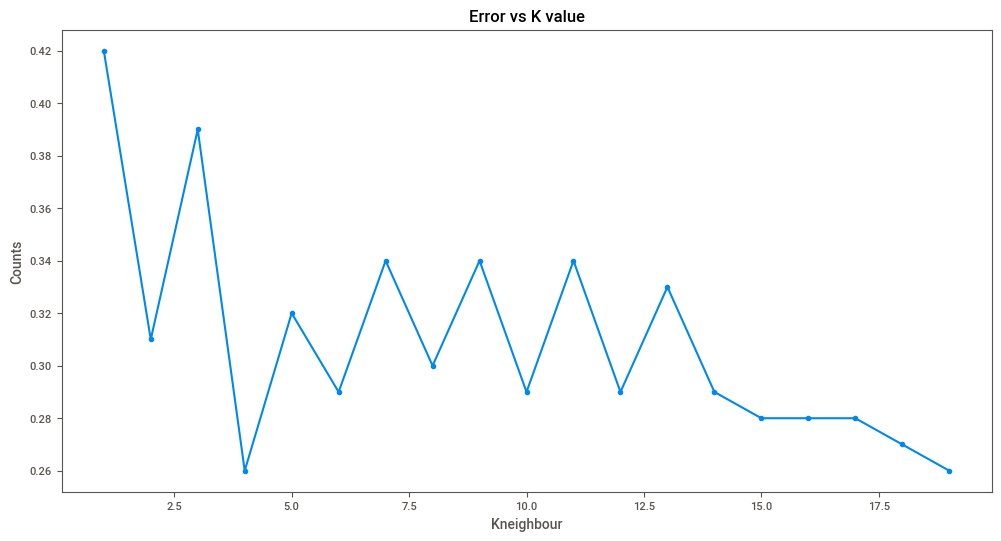

In [119]:
plt.figure(figsize=(12,6))
plt.plot(range(1,20),error_rate,marker='o')
plt.title('Error vs K value')
plt.xlabel('Kneighbour')
plt.ylabel('Counts')

In [120]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
accuracy_score(knn_pred,y_test)

0.74

In [121]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85        74
           1       0.50      0.12      0.19        26

    accuracy                           0.74       100
   macro avg       0.63      0.54      0.52       100
weighted avg       0.69      0.74      0.67       100



In [122]:
pd.crosstab(y_test,knn_pred)

col_0,0,1
paid,,
0,71,3
1,23,3


In [123]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, y, cv = 3, scoring='accuracy')
print(f'Score:{score}')
print(f'Cross Val Score{score.mean()}')
print(f'Std{score.std()}')

Score:[0.7245509  0.68862275 0.72891566]
Cross Val Score0.7140297717817378
Std0.018053627297169764


## Model 3 : Gradient Boost

In [124]:
from sklearn.ensemble import GradientBoostingClassifier
gr = GradientBoostingClassifier(n_estimators=12)
gr.fit(x_train,y_train)
gr_pred = gr.predict(x_test)
accuracy_score(gr_pred,y_test)

0.71

In [159]:
print(classification_report(y_test,gr_pred))

              precision    recall  f1-score   support

           0       0.74      0.93      0.83        74
           1       0.29      0.08      0.12        26

    accuracy                           0.71       100
   macro avg       0.51      0.50      0.47       100
weighted avg       0.62      0.71      0.64       100



In [162]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(gr,X,y , cv = 3, scoring='accuracy')
print(score)
print('Cross Val Score:',score.mean())
print('Std:',score.std())

[0.71856287 0.70658683 0.72891566]
Cross Val Score: 0.7180217877498016
Std: 0.009123735112938335


## Model 4 : Random Forest 

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth':(list(range(1,20))),
    'min_samples_split':(list(range(1,10))),
    'min_samples_leaf':(list(range(1,30))),
    'max_features':['auto','sqrt','log2'],
    'bootstrap':[True,False]
}


rf2 = RandomForestClassifier()
grid = RandomizedSearchCV(rf2, params, cv = 3 , scoring = 'accuracy', verbose=2, n_jobs = -1 )


grid.fit(x_train,y_train)
best_params = grid.best_params_
print(f'Best Parameters: {best_params}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 50, 'min_samples_split': 8, 'min_samples_leaf': 11, 'max_features': 'sqrt', 'max_depth': 14, 'bootstrap': False}


In [127]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestClassifier(n_estimators=50,
                           min_samples_split=3,
                           min_samples_leaf=5,
                           max_features='auto',
                           max_depth=5,
                           bootstrap=True)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
accuracy_score(y_test,rf_pred)

0.7

In [128]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82        74
           1       0.25      0.08      0.12        26

    accuracy                           0.70       100
   macro avg       0.49      0.50      0.47       100
weighted avg       0.61      0.70      0.64       100



## Model 5 : XGBoost

In [130]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth':(list(range(1,20))),
    'min_samples_split':(list(range(1,10))),
    'min_samples_leaf':(list(range(1,30))),
    'max_features':['auto','sqrt','log2'],
    'bootstrap':[True,False]
}


xgb = XGBClassifier()
grid = RandomizedSearchCV(xgb, params, cv = 3 , scoring = 'accuracy', verbose=2, n_jobs = -1 )


grid.fit(x_train,y_train)
best_params = grid.best_params_
print(f'Best Parameters: {best_params}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 1, 'min_samples_leaf': 21, 'max_features': 'auto', 'max_depth': 5, 'bootstrap': True}


In [132]:
xgb = XGBClassifier(n_estimators = 350,
                     min_samples_split = 5,
                     min_samples_leaf = 11,
                     max_features = 'sqrt',
                     max_depth = 11,
                     bootstrap = True)
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,xgb_pred))

Accuracy Score: 0.69


In [133]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        74
           1       0.35      0.23      0.28        26

    accuracy                           0.69       100
   macro avg       0.56      0.54      0.54       100
weighted avg       0.65      0.69      0.67       100



## Model 6 : Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
accuracy_score(lr_pred,y_test)

0.69

## Model 7 : Decision Tree

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'criterion':['gini','entropy'],
    'max_depth':(list(range(1,20))),
    'splitter':['best','random'],
    'min_samples_split':(list(range(1,10))),
    'min_samples_leaf':(list(range(1,20)))
}


dt2 = DecisionTreeClassifier()
grid = GridSearchCV(dt2, params, cv = 3 , scoring = 'accuracy', verbose=2, n_jobs = -1 )


grid.fit(x_train,y_train)
best_params = grid.best_params_
print(f'Best Parameters: {best_params}')

Fitting 3 folds for each of 12996 candidates, totalling 38988 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 18, 'min_samples_split': 4, 'splitter': 'random'}


In [153]:
dt2 = DecisionTreeClassifier(criterion = 'gini',
                             max_depth = 17,
                             min_samples_leaf = 12,
                             min_samples_split = 3,
                             splitter = 'random')
dt2.fit(x_train,y_train)
dt2_pred = dt2.predict(x_test)
accuracy_score(y_test,dt2_pred)

0.65

# Model Comparison

In [156]:
df = pd.DataFrame()
df['Model']=['Support Vector Classifier','K-Nearest Neighbors','Gradient Boost','Random Forest','XGBoost','Logistic Regression',
             'Decision Tree',]
df['Accuracy'] = [75,74,71,71,69,69,67]
df

,Model,Accuracy
0,Support Vector Classifier,75
1,K-Nearest Neighbors,74
2,Gradient Boost,71
3,Random Forest,71
4,XGBoost,69
5,Logistic Regression,69
6,Decision Tree,67


In [157]:
from prettytable import PrettyTable
table = PrettyTable(['Support Vector Classifier','K-Nearest Neighbors','Random Forest','Gradient Boost','XGBoost','Logistic Regression',
             'Decision Tree'])
table.add_row([75,74,71,71,69,69,67])
print(table)                  

+---------------------------+---------------------+---------------+----------------+---------+---------------------+---------------+
| Support Vector Classifier | K-Nearest Neighbors | Random Forest | Gradient Boost | XGBoost | Logistic Regression | Decision Tree |
+---------------------------+---------------------+---------------+----------------+---------+---------------------+---------------+
|             75            |          74         |       71      |       71       |    69   |          69         |       67      |
+---------------------------+---------------------+---------------+----------------+---------+---------------------+---------------+


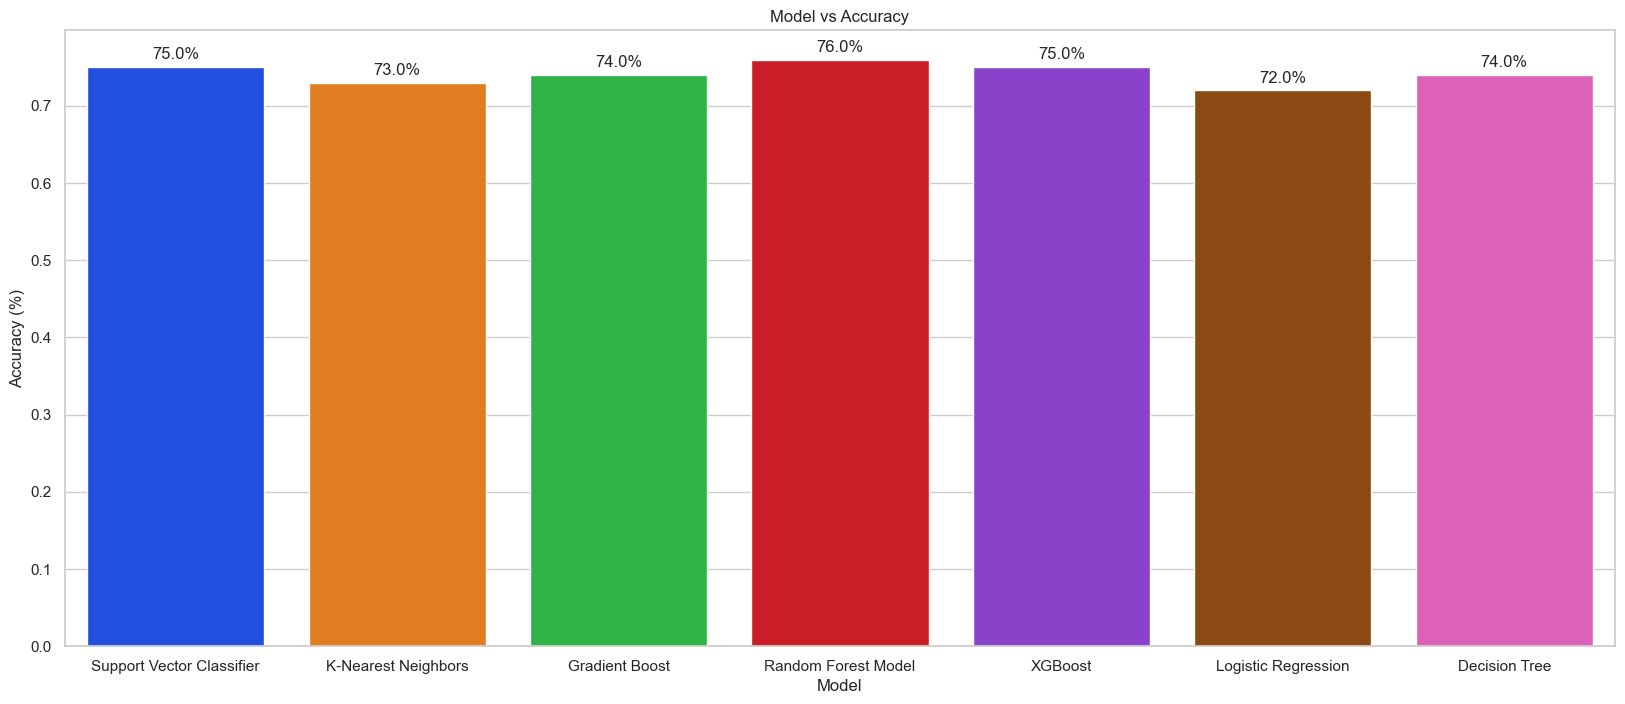

In [158]:
data = {'Model': ['Support Vector Classifier', 'K-Nearest Neighbors', 'Gradient Boost', 
                  'Random Forest Model', 'XGBoost', 'Logistic Regression', 'Decision Tree'],
        'Accuracy': [0.75, 0.73, 0.74, 0.76, 0.75, 0.72, 0.74]}  # Accuracy as decimals

df = pd.DataFrame(data)

# Create the plot
plt.figure(figsize=(20, 8))
sns.set(style='whitegrid')

# Barplot
bar_plot = sns.barplot(x='Model', y='Accuracy', data=df, palette='bright')

# Add text annotations
for p in bar_plot.patches:
    percentage = '{:.1f}%'.format(p.get_height() * 100)  # Convert to percentage
    bar_plot.annotate(percentage, 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 9),  # 9 points vertical offset
                      textcoords='offset points')

# Add titles and labels
plt.title('Model vs Accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Model')
plt.show()


In [163]:
import pickle 
pickle.dump(svc_pred,open('model.pkl','wb'))